In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
import pylab

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)


In [76]:
df=pd.read_csv('http://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_month.csv', encoding='latin-1')
df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,133406.450904,132451.459053,131860.678402,131794.291256,131549.862872,132302.640790,132718.604180,131792.812271,131586.809571,132017.330931,132317.173336,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,...,473986.864569,485960.068142,497135.588066,505371.325192,514740.096969,523206.177927,533182.542268,542276.237550,547694.780895,561650.172135,573736.712118,586436.305662,599963.150475,612643.252439,628288.797340,634662.946561,637055.021877,639061.343281,642200.478050,646401.814244,644122.245406,644725.041989,650206.324475,659367.445844,670031.113117
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,182889.205724,182899.578780,181699.504516,185038.379311,186019.735051,191071.555999,188934.166999,189317.756861,186878.561620,187023.401963,188963.101314,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,...,421676.264320,430122.559370,438441.005931,445611.978423,450451.345383,453867.022414,457922.663047,463426.557119,467729.732559,476237.496647,484956.141756,494327.482818,503245.113736,512359.797855,519348.474253,519739.958270,516162.624473,512436.728405,508951.272090,505393.204566,500486.071906,497368.833953,499053.583916,503169.088549,507937.279377
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111389.390383,111383.266339,111988.073641,111737.228669,111687.419142,111530.735090,111565.891006,111726.504609,111374.251392,110959.229662,110977.975440,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,...,235517.709703,238602.882734,241894.186268,243615.558692,245398.293697,247844.580417,250649.879559,253617.997138,256869.100489,262825.963618,268959.580034,274359.050080,279046.448403,283150.882397,287195.328430,288355.961418,287265.377933,286268.196772,284375.562333,281962.291239,279278.529617,276999.430806,276133.935571,276987.155106,277509.746906
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,191023.600700,192297.691977,194158.884652,194222.787160,194142.069378,193242.513379,192953.734024,194257.601274,194819.458675,195911.248978,196811.492053,197978.237260,197989.590781,197956.636810,199149.828922,200823.087105,...,844574.117903,852917.511586,861253.723042,860858.819537,858526.836754,861196.549863,870043.026521,876377.054707,874634.051215,875162.528634,877257.719172,884999.106754,893209.418338,907471.958728,929497.467587,932127.985408,934303.576241,929095.906656,926376.482038,930780.245819,922219.031037,920220.362673,911167.997403,900515.191547,893353.243078
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176706.426846,176982.149315,177188.949578,178206.443401,179008.023467,179779.694499,180199.803749,179599.464857,178853.954125,178351.100109,178021.647366,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,...,397296.954720,410530.538246,423473.592825,427481.144653,427623.785827,426688.980050,427108.591887,430375.637280,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.882690,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777
5,62093,5,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,172847.634682,171983.251087,170672.737563,171039.531

In [77]:

#look for null values 
znull=df.isnull().sum()
print("Number of Null Values:", znull.sum())
print("Number of Rows:", len(df))
print("Number of Columns:", df.shape[1])


#Summary statistics to provide a 

Number of Null Values: 2068145
Number of Rows: 29532
Number of Columns: 336


In [78]:
#change the name of the "Region Name to ZipCode"
z=df.rename(columns={'RegionName': 'ZipCode'})
#drop the RegionType column because it just let us know the 'RegionName' is a "zip"
z=z.drop('RegionType', axis=1)
z=z.drop('StateName', axis=1)
z

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,61148,0,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,133406.450904,132451.459053,131860.678402,131794.291256,131549.862872,132302.640790,132718.604180,131792.812271,131586.809571,132017.330931,132317.173336,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,...,473986.864569,485960.068142,497135.588066,505371.325192,514740.096969,523206.177927,533182.542268,542276.237550,547694.780895,561650.172135,573736.712118,586436.305662,599963.150475,612643.252439,628288.797340,634662.946561,637055.021877,639061.343281,642200.478050,646401.814244,644122.245406,644725.041989,650206.324475,659367.445844,670031.113117
1,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,182889.205724,182899.578780,181699.504516,185038.379311,186019.735051,191071.555999,188934.166999,189317.756861,186878.561620,187023.401963,188963.101314,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,...,421676.264320,430122.559370,438441.005931,445611.978423,450451.345383,453867.022414,457922.663047,463426.557119,467729.732559,476237.496647,484956.141756,494327.482818,503245.113736,512359.797855,519348.474253,519739.958270,516162.624473,512436.728405,508951.272090,505393.204566,500486.071906,497368.833953,499053.583916,503169.088549,507937.279377
2,91940,2,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111389.390383,111383.266339,111988.073641,111737.228669,111687.419142,111530.735090,111565.891006,111726.504609,111374.251392,110959.229662,110977.975440,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,...,235517.709703,238602.882734,241894.186268,243615.558692,245398.293697,247844.580417,250649.879559,253617.997138,256869.100489,262825.963618,268959.580034,274359.050080,279046.448403,283150.882397,287195.328430,288355.961418,287265.377933,286268.196772,284375.562333,281962.291239,279278.529617,276999.430806,276133.935571,276987.155106,277509.746906
3,62080,3,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,191023.600700,192297.691977,194158.884652,194222.787160,194142.069378,193242.513379,192953.734024,194257.601274,194819.458675,195911.248978,196811.492053,197978.237260,197989.590781,197956.636810,199149.828922,200823.087105,201942.390354,202483.659175,...,844574.117903,852917.511586,861253.723042,860858.819537,858526.836754,861196.549863,870043.026521,876377.054707,874634.051215,875162.528634,877257.719172,884999.106754,893209.418338,907471.958728,929497.467587,932127.985408,934303.576241,929095.906656,926376.482038,930780.245819,922219.031037,920220.362673,911167.997403,900515.191547,893353.243078
4,92593,4,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176706.426846,176982.149315,177188.949578,178206.443401,179008.023467,179779.694499,180199.803749,179599.464857,178853.954125,178351.100109,178021.647366,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,...,397296.954720,410530.538246,423473.592825,427481.144653,427623.785827,426688.980050,427108.591887,430375.637280,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.882690,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777
...,...,...,...,...,...,...,...,...,..

In [79]:
zycp=['1996-02-29', '1996-03-31', '1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31', '1996-09-30', '1996-10-31', '1996-11-30', '1996-12-31']
z=z.drop(columns=zycp)

In [80]:
#use regular expression to remove the comma and the state arcoynm fromthe Metro Column
z['Metro'] = z['Metro'].str.replace(r',.*', '', regex=True)
z

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,61148,0,8701,NJ,Lakewood,New York-Newark-Jersey City,Ocean County,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,473986.864569,485960.068142,497135.588066,505371.325192,514740.096969,523206.177927,533182.542268,542276.237550,547694.780895,561650.172135,573736.712118,586436.305662,599963.150475,612643.252439,628288.797340,634662.946561,637055.021877,639061.343281,642200.478050,646401.814244,644122.245406,644725.041989,650206.324475,659367.445844,670031.113117
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Fort Bend County,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,421676.264320,430122.559370,438441.005931,445611.978423,450451.345383,453867.022414,457922.663047,463426.557119,467729.732559,476237.496647,484956.141756,494327.482818,503245.113736,512359.797855,519348.474253,519739.958270,516162.624473,512436.728405,508951.272090,505393.204566,500486.071906,497368.833953,499053.583916,503169.088549,507937.279377
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,235517.709703,238602.882734,241894.186268,243615.558692,245398.293697,247844.580417,250649.879559,253617.997138,256869.100489,262825.963618,268959.580034,274359.050080,279046.448403,283150.882397,287195.328430,288355.961418,287265.377933,286268.196772,284375.562333,281962.291239,279278.529617,276999.430806,276133.935571,276987.155106,277509.746906
3,62080,3,11368,NY,New York,New York-Newark-Jersey City,Queens County,197978.237260,197989.590781,197956.636810,199149.828922,200823.087105,201942.390354,202483.659175,203355.925078,203642.918340,204692.166656,205859.970187,206453.310442,206500.107646,206814.367162,206440.690054,206708.194492,207845.239478,210860.898217,...,844574.117903,852917.511586,861253.723042,860858.819537,858526.836754,861196.549863,870043.026521,876377.054707,874634.051215,875162.528634,877257.719172,884999.106754,893209.418338,907471.958728,929497.467587,932127.985408,934303.576241,929095.906656,926376.482038,930780.245819,922219.031037,920220.362673,911167.997403,900515.191547,893353.243078
4,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,Travis County,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,397296.954720,410530.538246,423473.592825,427481.144653,427623.785827,426688.980050,427108.591887,430375.637280,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.882690,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [81]:
#use regular expression to remove the comma and the state arcoynm fromthe Metro Column
z['Metro'] = z['Metro'].str.replace(r',.*', '', regex=True)
z

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,61148,0,8701,NJ,Lakewood,New York-Newark-Jersey City,Ocean County,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,473986.864569,485960.068142,497135.588066,505371.325192,514740.096969,523206.177927,533182.542268,542276.237550,547694.780895,561650.172135,573736.712118,586436.305662,599963.150475,612643.252439,628288.797340,634662.946561,637055.021877,639061.343281,642200.478050,646401.814244,644122.245406,644725.041989,650206.324475,659367.445844,670031.113117
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Fort Bend County,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,421676.264320,430122.559370,438441.005931,445611.978423,450451.345383,453867.022414,457922.663047,463426.557119,467729.732559,476237.496647,484956.141756,494327.482818,503245.113736,512359.797855,519348.474253,519739.958270,516162.624473,512436.728405,508951.272090,505393.204566,500486.071906,497368.833953,499053.583916,503169.088549,507937.279377
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,235517.709703,238602.882734,241894.186268,243615.558692,245398.293697,247844.580417,250649.879559,253617.997138,256869.100489,262825.963618,268959.580034,274359.050080,279046.448403,283150.882397,287195.328430,288355.961418,287265.377933,286268.196772,284375.562333,281962.291239,279278.529617,276999.430806,276133.935571,276987.155106,277509.746906
3,62080,3,11368,NY,New York,New York-Newark-Jersey City,Queens County,197978.237260,197989.590781,197956.636810,199149.828922,200823.087105,201942.390354,202483.659175,203355.925078,203642.918340,204692.166656,205859.970187,206453.310442,206500.107646,206814.367162,206440.690054,206708.194492,207845.239478,210860.898217,...,844574.117903,852917.511586,861253.723042,860858.819537,858526.836754,861196.549863,870043.026521,876377.054707,874634.051215,875162.528634,877257.719172,884999.106754,893209.418338,907471.958728,929497.467587,932127.985408,934303.576241,929095.906656,926376.482038,930780.245819,922219.031037,920220.362673,911167.997403,900515.191547,893353.243078
4,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,Travis County,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,397296.954720,410530.538246,423473.592825,427481.144653,427623.785827,426688.980050,427108.591887,430375.637280,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.882690,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [82]:
#Remove the lt y of the month from the column
z.columns = z.columns.str.rsplit('-', n=1).str.get(0)
z

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,61148,0,8701,NJ,Lakewood,New York-Newark-Jersey City,Ocean County,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,473986.864569,485960.068142,497135.588066,505371.325192,514740.096969,523206.177927,533182.542268,542276.237550,547694.780895,561650.172135,573736.712118,586436.305662,599963.150475,612643.252439,628288.797340,634662.946561,637055.021877,639061.343281,642200.478050,646401.814244,644122.245406,644725.041989,650206.324475,659367.445844,670031.113117
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Fort Bend County,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,421676.264320,430122.559370,438441.005931,445611.978423,450451.345383,453867.022414,457922.663047,463426.557119,467729.732559,476237.496647,484956.141756,494327.482818,503245.113736,512359.797855,519348.474253,519739.958270,516162.624473,512436.728405,508951.272090,505393.204566,500486.071906,497368.833953,499053.583916,503169.088549,507937.279377
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,235517.709703,238602.882734,241894.186268,243615.558692,245398.293697,247844.580417,250649.879559,253617.997138,256869.100489,262825.963618,268959.580034,274359.050080,279046.448403,283150.882397,287195.328430,288355.961418,287265.377933,286268.196772,284375.562333,281962.291239,279278.529617,276999.430806,276133.935571,276987.155106,277509.746906
3,62080,3,11368,NY,New York,New York-Newark-Jersey City,Queens County,197978.237260,197989.590781,197956.636810,199149.828922,200823.087105,201942.390354,202483.659175,203355.925078,203642.918340,204692.166656,205859.970187,206453.310442,206500.107646,206814.367162,206440.690054,206708.194492,207845.239478,210860.898217,...,844574.117903,852917.511586,861253.723042,860858.819537,858526.836754,861196.549863,870043.026521,876377.054707,874634.051215,875162.528634,877257.719172,884999.106754,893209.418338,907471.958728,929497.467587,932127.985408,934303.576241,929095.906656,926376.482038,930780.245819,922219.031037,920220.362673,911167.997403,900515.191547,893353.243078
4,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,Travis County,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,397296.954720,410530.538246,423473.592825,427481.144653,427623.785827,426688.980050,427108.591887,430375.637280,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.882690,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2

In [83]:
#Drop null values due to the large number of null values found rather than filling it in
z=z.dropna()
znull=z.isnull().sum()
print("Number of Null Values:", znull.sum())
print("Number of Rows:", len(z))
print("Number of Columns:", z.shape[1])


Number of Null Values: 0
Number of Rows: 11930
Number of Columns: 323


In [84]:
## Importing additional data https://www.bls.gov/lau/laucnty22.xlsx
df_labor2022 = pd.read_excel('laucnty22.xlsx',header=4)
df_labor = df_labor2022.iloc[1:3143,:].copy() # the 50 states not including PR
df_labor.reset_index(inplace=True)
df_labor.dropna(axis=1, inplace=True)

In [85]:
df_labor

,index,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%)
0,1,CN0100100000000,1.0,1.0,"Autauga County, AL",2022.0,26789.0,26181.0,608.0,2.3
1,2,CN0100300000000,1.0,3.0,"Baldwin County, AL",2022.0,102849.0,100432.0,2417.0,2.4
2,3,CN0100500000000,1.0,5.0,"Barbour County, AL",2022.0,8241.0,7906.0,335.0,4.1
3,4,CN0100700000000,1.0,7.0,"Bibb County, AL",2022.0,8726.0,8507.0,219.0,2.5
4,5,CN0100900000000,1.0,9.0,"Blount County, AL",2022.0,25796.0,25222.0,574.0,2.2
...,...,...,...,...,...,...,...,...,...,...
3137,3138,CN5603700000000,56.0,37.0,"Sweetwater County, WY",2022.0,19507.0,18696.0,811.0,4.2
3138,3139,CN5603900000000,56.0,39.0,"Teton County, WY",2022.0,16647.0,16193.0,454.0,2.7
3139,3140,CN5604100000000,56.0,41.0,"Uinta County, WY",2022.0,8863.0,8524.0,339.0,3.8
3140,3141,CN5604300000000,56.0,43.0,"Washakie County, WY",2022.0,3858.0,3704.0,154.0,4.0


In [86]:
df_1997 = z[pd.notnull(z['1997-01'])].copy()
# check na values after 1997
df_1997.loc[:,'1997-01':'2018-12'].isna().sum()

1997-01    0
1997-02    0
1997-03    0
1997-04    0
1997-05    0
1997-06    0
1997-07    0
1997-08    0
1997-09    0
1997-10    0
1997-11    0
1997-12    0
1998-01    0
1998-02    0
1998-03    0
1998-04    0
1998-05    0
1998-06    0
1998-07    0
1998-08    0
1998-09    0
1998-10    0
1998-11    0
1998-12    0
1999-01    0
1999-02    0
1999-03    0
1999-04    0
1999-05    0
1999-06    0
1999-07    0
1999-08    0
1999-09    0
1999-10    0
1999-11    0
1999-12    0
2000-01    0
2000-02    0
2000-03    0
2000-04    0
2000-05    0
2000-06    0
2000-07    0
2000-08    0
2000-09    0
2000-10    0
2000-11    0
2000-12    0
2001-01    0
2001-02    0
2001-03    0
2001-04    0
2001-05    0
2001-06    0
2001-07    0
2001-08    0
2001-09    0
2001-10    0
2001-11    0
2001-12    0
2002-01    0
2002-02    0
2002-03    0
2002-04    0
2002-05    0
2002-06    0
2002-07    0
2002-08    0
2002-09    0
2002-10    0
2002-11    0
2002-12    0
2003-01    0
2003-02    0
2003-03    0
2003-04    0
2003-05    0

In [87]:
df_1997 

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,61148,0,8701,NJ,Lakewood,New York-Newark-Jersey City,Ocean County,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,4.739869e+05,4.859601e+05,4.971356e+05,5.053713e+05,5.147401e+05,5.232062e+05,5.331825e+05,5.422762e+05,5.476948e+05,5.616502e+05,5.737367e+05,5.864363e+05,5.999632e+05,6.126433e+05,6.282888e+05,6.346629e+05,6.370550e+05,6.390613e+05,6.422005e+05,6.464018e+05,6.441222e+05,6.447250e+05,6.502063e+05,6.593674e+05,6.700311e+05
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Fort Bend County,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,4.216763e+05,4.301226e+05,4.384410e+05,4.456120e+05,4.504513e+05,4.538670e+05,4.579227e+05,4.634266e+05,4.677297e+05,4.762375e+05,4.849561e+05,4.943275e+05,5.032451e+05,5.123598e+05,5.193485e+05,5.197400e+05,5.161626e+05,5.124367e+05,5.089513e+05,5.053932e+05,5.004861e+05,4.973688e+05,4.990536e+05,5.031691e+05,5.079373e+05
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,2.355177e+05,2.386029e+05,2.418942e+05,2.436156e+05,2.453983e+05,2.478446e+05,2.506499e+05,2.536180e+05,2.568691e+05,2.628260e+05,2.689596e+05,2.743591e+05,2.790464e+05,2.831509e+05,2.871953e+05,2.883560e+05,2.872654e+05,2.862682e+05,2.843756e+05,2.819623e+05,2.792785e+05,2.769994e+05,2.761339e+05,2.769872e+05,2.775097e+05
4,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,Travis County,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,3.972970e+05,4.105305e+05,4.234736e+05,4.274811e+05,4.276238e+05,4.266890e+05,4.271086e+05,4.303756e+05,4.351305e+05,4.440341e+05,4.544320e+05,4.674230e+05,4.798906e+05,4.864056e+05,4.878590e+05,4.813669e+05,4.728861e+05,4.634734e+05,4.549067e+05,4.454434e+05,4.367237e+05,4.329603e+05,4.310121e+05,4.306347e+05,4.315247e+05
5,62093,5,11385,NY,New York,New York-Newark-Jersey City,Queens County,175560.749897,177489.167697,177450.627375,178906.045121,177515.919516,178440.296989,179319.128636,179738.979672,181338.594305,183919.852292,185477.620353,185941.468029,188276.480376,187357.253749,186603.609710,187083.229822,187538.708681,189677.907001,...,7.359881e+05,7.417669e+05,7.474945e+05,7.496278e+05,7.505467e+05,7.543534e+05,7.584507e+05,7.632640e+05,7.629584e+05,7.614545e+05,7.601083e+05,7.662684e+05,7.723069e+05,7.841335e+05,7.987155e+05,7.989614e+05,7.988396e+05,7.961248e+05,7.937141e+05,7.945753e+05,7.877761e+05,7.884405e+05,7.869105e+05,7.877890e+05,7.873066e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29515,69057,39809,26544,WV,Maidsville,Morgantown,Monongalia County,42460.191779,42259.250859,44587.397421,45425.811916,47185.1

In [88]:
def normalize_str(strings):
    """
    Expect: string contain uppercase and lowercase, "'" sign, '/city', 'Saint', '/municipality'
    Modifies: convert upper to lower, strip leading or trailing spaces, remove unwanted string, change 'saint' to 'st.'
    Returns: lowercasestring
    """
    temp=strings.lower()
    if "'" in temp:
        temp=temp.replace("'",'')
    if '/city' in temp:
        temp=temp.replace('/city','')
    if 'saint' in temp:
        temp=temp.replace('saint','st.')
    if '/municipality' in temp:
        temp=temp.replace('/municipality','')
    result=temp.strip()
    return result

In [89]:
# Normalize the 'County Name'
df_1997['CountyName'] = df_1997['CountyName'].apply(normalize_str)


In [17]:
df_1997['CountyName']=df_1997['CountyName'].apply(normalize_str)
df_1997

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,61148,0,8701,NJ,Lakewood,New York-Newark-Jersey City,ocean county,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,4.739869e+05,4.859601e+05,4.971356e+05,5.053713e+05,5.147401e+05,5.232062e+05,5.331825e+05,5.422762e+05,5.476948e+05,5.616502e+05,5.737367e+05,5.864363e+05,5.999632e+05,6.126433e+05,6.282888e+05,6.346629e+05,6.370550e+05,6.390613e+05,6.422005e+05,6.464018e+05,6.441222e+05,6.447250e+05,6.502063e+05,6.593674e+05,6.700311e+05
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,fort bend county,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,4.216763e+05,4.301226e+05,4.384410e+05,4.456120e+05,4.504513e+05,4.538670e+05,4.579227e+05,4.634266e+05,4.677297e+05,4.762375e+05,4.849561e+05,4.943275e+05,5.032451e+05,5.123598e+05,5.193485e+05,5.197400e+05,5.161626e+05,5.124367e+05,5.089513e+05,5.053932e+05,5.004861e+05,4.973688e+05,4.990536e+05,5.031691e+05,5.079373e+05
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,harris county,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,2.355177e+05,2.386029e+05,2.418942e+05,2.436156e+05,2.453983e+05,2.478446e+05,2.506499e+05,2.536180e+05,2.568691e+05,2.628260e+05,2.689596e+05,2.743591e+05,2.790464e+05,2.831509e+05,2.871953e+05,2.883560e+05,2.872654e+05,2.862682e+05,2.843756e+05,2.819623e+05,2.792785e+05,2.769994e+05,2.761339e+05,2.769872e+05,2.775097e+05
4,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,travis county,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,3.972970e+05,4.105305e+05,4.234736e+05,4.274811e+05,4.276238e+05,4.266890e+05,4.271086e+05,4.303756e+05,4.351305e+05,4.440341e+05,4.544320e+05,4.674230e+05,4.798906e+05,4.864056e+05,4.878590e+05,4.813669e+05,4.728861e+05,4.634734e+05,4.549067e+05,4.454434e+05,4.367237e+05,4.329603e+05,4.310121e+05,4.306347e+05,4.315247e+05
5,62093,5,11385,NY,New York,New York-Newark-Jersey City,queens county,175560.749897,177489.167697,177450.627375,178906.045121,177515.919516,178440.296989,179319.128636,179738.979672,181338.594305,183919.852292,185477.620353,185941.468029,188276.480376,187357.253749,186603.609710,187083.229822,187538.708681,189677.907001,...,7.359881e+05,7.417669e+05,7.474945e+05,7.496278e+05,7.505467e+05,7.543534e+05,7.584507e+05,7.632640e+05,7.629584e+05,7.614545e+05,7.601083e+05,7.662684e+05,7.723069e+05,7.841335e+05,7.987155e+05,7.989614e+05,7.988396e+05,7.961248e+05,7.937141e+05,7.945753e+05,7.877761e+05,7.884405e+05,7.869105e+05,7.877890e+05,7.873066e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29515,69057,39809,26544,WV,Maidsville,Morgantown,monongalia county,42460.191779,42259.250859,44587.397421,45425.811916,47185.1

In [90]:
def zipcode(strings):
    """
    Expect: strings less than 5 characters, ex: "123"
    Modifies: pad 0 before the strings
    Returns: a string with lenght of 5
    """
    # if length of strings is 5; remain the samne
    if len(strings) == 5:
        return strings
    # if length of strings less than 5; pad 0s to the left
    elif len(strings) < 5:
        result = strings.zfill(5)
        return result

In [91]:
df_1997=df_1997.astype({'ZipCode':str}) 
df_1997['ZipCode']=df_1997['ZipCode'].apply(zipcode)

In [92]:
df_1997.loc[[319]]

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
319,70909,324,30135,GA,Douglasville,Atlanta-Sandy Springs-Alpharetta,douglas county,117699.35289,118050.74673,118938.495381,120080.764633,120793.533546,121275.238763,122013.541973,122634.468293,122997.217186,123174.060274,123590.607734,123955.987399,124466.50909,124845.300599,125832.731041,127070.003772,128474.296122,129288.790893,...,269150.430579,275360.698364,281515.97694,286178.098794,289249.93306,292552.337099,297032.018812,301192.191459,305608.008486,314032.792889,320375.038976,327153.502443,334107.920837,339668.962666,344010.02956,344487.316953,341668.575181,338780.139151,336573.52504,333158.645902,328895.0529,329275.79461,327086.236895,326684.884193,327474.380211


In [93]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           3142 non-null   int64  
 1   Code                            3142 non-null   object 
 2   Code.1                          3142 non-null   float64
 3   Code.2                          3142 non-null   float64
 4   County Name/State Abbreviation  3142 non-null   object 
 5   Year                            3142 non-null   float64
 6   Force                           3142 non-null   float64
 7   Employed                        3142 non-null   float64
 8   Unemployed                      3142 non-null   float64
 9   (%)                             3142 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 245.6+ KB


In [94]:
# Define a split_2 function to split county name and state abbreviation
def split_2(cell_str):
    """
    Expect: a string such as 'Autauga County, AL'
    Modifies: split the string on ', '
    Returns: a list
    """
    # strip the leading or trailing spaces, then split
    result = cell_str.strip().split(', ')
    return result

In [95]:
df_labor['County Name/State Abbreviation_list'] = df_labor['County Name/State Abbreviation'].map(split_2)
df_CNT_ST= pd.DataFrame(df_labor['County Name/State Abbreviation_list'].values.tolist(), 
             columns=['County Name','State Abbreviation'])

In [96]:
df_CNT_ST

,County Name,State Abbreviation
0,Autauga County,AL
1,Baldwin County,AL
2,Barbour County,AL
3,Bibb County,AL
4,Blount County,AL
...,...,...
3137,Sweetwater County,WY
3138,Teton County,WY
3139,Uinta County,WY
3140,Washakie County,WY


In [97]:
# Normalize the 'County Name'
df_CNT_ST['County Name'] = df_CNT_ST['County Name'].apply(normalize_str)

In [98]:
# Perform the merge operation
df_unemployed_rate = df_CNT_ST.merge(df_labor[['(%)']], left_index=True, right_index=True)

# Rename the column
df_unemployed_rate.rename(columns={'(%)': 'Rate'}, inplace=True)


In [99]:
df_unemployed_rate

,County Name,State Abbreviation,Rate
0,autauga county,AL,2.3
1,baldwin county,AL,2.4
2,barbour county,AL,4.1
3,bibb county,AL,2.5
4,blount county,AL,2.2
...,...,...,...
3137,sweetwater county,WY,4.2
3138,teton county,WY,2.7
3139,uinta county,WY,3.8
3140,washakie county,WY,4.0


In [100]:



# df_1997 has 13916 records and merged_left should have 13916 records after merging
zw = pd.merge(left=df_1997,right=df_unemployed_rate, 
                         left_on=['CountyName','State'], 
                         right_on=['County Name','State Abbreviation'],
                         how='left')

# What's the size of the output data?
zw.shape

(11930, 326)

In [101]:
zw

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,County Name,State Abbreviation,Rate
0,61148,0,08701,NJ,Lakewood,New York-Newark-Jersey City,ocean county,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,5.053713e+05,5.147401e+05,5.232062e+05,5.331825e+05,5.422762e+05,5.476948e+05,5.616502e+05,5.737367e+05,5.864363e+05,5.999632e+05,6.126433e+05,6.282888e+05,6.346629e+05,6.370550e+05,6.390613e+05,6.422005e+05,6.464018e+05,6.441222e+05,6.447250e+05,6.502063e+05,6.593674e+05,6.700311e+05,ocean county,NJ,3.7
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,fort bend county,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,4.456120e+05,4.504513e+05,4.538670e+05,4.579227e+05,4.634266e+05,4.677297e+05,4.762375e+05,4.849561e+05,4.943275e+05,5.032451e+05,5.123598e+05,5.193485e+05,5.197400e+05,5.161626e+05,5.124367e+05,5.089513e+05,5.053932e+05,5.004861e+05,4.973688e+05,4.990536e+05,5.031691e+05,5.079373e+05,fort bend county,TX,3.9
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,harris county,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,2.436156e+05,2.453983e+05,2.478446e+05,2.506499e+05,2.536180e+05,2.568691e+05,2.628260e+05,2.689596e+05,2.743591e+05,2.790464e+05,2.831509e+05,2.871953e+05,2.883560e+05,2.872654e+05,2.862682e+05,2.843756e+05,2.819623e+05,2.792785e+05,2.769994e+05,2.761339e+05,2.769872e+05,2.775097e+05,harris county,TX,4.2
3,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,travis county,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,4.274811e+05,4.276238e+05,4.266890e+05,4.271086e+05,4.303756e+05,4.351305e+05,4.440341e+05,4.544320e+05,4.674230e+05,4.798906e+05,4.864056e+05,4.878590e+05,4.813669e+05,4.728861e+05,4.634734e+05,4.549067e+05,4.454434e+05,4.367237e+05,4.329603e+05,4.310121e+05,4.306347e+05,4.315247e+05,travis county,TX,2.8
4,62093,5,11385,NY,New York,New York-Newark-Jersey City,queens county,175560.749897,177489.167697,177450.627375,178906.045121,177515.919516,178440.296989,179319.128636,179738.979672,181338.594305,183919.852292,185477.620353,185941.468029,188276.480376,187357.253749,186603.609710,187083.229822,187538.708681,189677.907001,...,7.496278e+05,7.505467e+05,7.543534e+05,7.584507e+05,7.632640e+05,7.629584e+05,7.614545e+05,7.601083e+05,7.662684e+05,7.723069e+05,7.841335e+05,7.987155e+05,7.989614e+05,7.988396e+05,7.961248e+05,7.937141e+05,7.945753e+05,7.877761e+05,7.884405e+05,7.869105e+05,7.877890e+05,7.873066e+05,queens county,NY,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,69057,39809,26544,WV,Maidsville,Morgantown,monongalia county,42460.191779,42259.250859,44587.397421,45425.811916,47185.129694,47775.300753,49184.317077,50683.344996,51261.207121,50702.236313,5152

In [102]:
#number of null values that were created after merge
null_counts = zw[zw['Rate'].isnull()].groupby(['State', 'Metro', 'CountyName']).count()

In [103]:
# The average unemployment rate
zw['Rate'].mean()

3.6673471102150534

In [104]:
zw = zw.dropna(subset=['Rate'])


In [105]:
zw

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,County Name,State Abbreviation,Rate
0,61148,0,08701,NJ,Lakewood,New York-Newark-Jersey City,ocean county,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,5.053713e+05,5.147401e+05,5.232062e+05,5.331825e+05,5.422762e+05,5.476948e+05,5.616502e+05,5.737367e+05,5.864363e+05,5.999632e+05,6.126433e+05,6.282888e+05,6.346629e+05,6.370550e+05,6.390613e+05,6.422005e+05,6.464018e+05,6.441222e+05,6.447250e+05,6.502063e+05,6.593674e+05,6.700311e+05,ocean county,NJ,3.7
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,fort bend county,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,4.456120e+05,4.504513e+05,4.538670e+05,4.579227e+05,4.634266e+05,4.677297e+05,4.762375e+05,4.849561e+05,4.943275e+05,5.032451e+05,5.123598e+05,5.193485e+05,5.197400e+05,5.161626e+05,5.124367e+05,5.089513e+05,5.053932e+05,5.004861e+05,4.973688e+05,4.990536e+05,5.031691e+05,5.079373e+05,fort bend county,TX,3.9
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,harris county,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,2.436156e+05,2.453983e+05,2.478446e+05,2.506499e+05,2.536180e+05,2.568691e+05,2.628260e+05,2.689596e+05,2.743591e+05,2.790464e+05,2.831509e+05,2.871953e+05,2.883560e+05,2.872654e+05,2.862682e+05,2.843756e+05,2.819623e+05,2.792785e+05,2.769994e+05,2.761339e+05,2.769872e+05,2.775097e+05,harris county,TX,4.2
3,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,travis county,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,4.274811e+05,4.276238e+05,4.266890e+05,4.271086e+05,4.303756e+05,4.351305e+05,4.440341e+05,4.544320e+05,4.674230e+05,4.798906e+05,4.864056e+05,4.878590e+05,4.813669e+05,4.728861e+05,4.634734e+05,4.549067e+05,4.454434e+05,4.367237e+05,4.329603e+05,4.310121e+05,4.306347e+05,4.315247e+05,travis county,TX,2.8
4,62093,5,11385,NY,New York,New York-Newark-Jersey City,queens county,175560.749897,177489.167697,177450.627375,178906.045121,177515.919516,178440.296989,179319.128636,179738.979672,181338.594305,183919.852292,185477.620353,185941.468029,188276.480376,187357.253749,186603.609710,187083.229822,187538.708681,189677.907001,...,7.496278e+05,7.505467e+05,7.543534e+05,7.584507e+05,7.632640e+05,7.629584e+05,7.614545e+05,7.601083e+05,7.662684e+05,7.723069e+05,7.841335e+05,7.987155e+05,7.989614e+05,7.988396e+05,7.961248e+05,7.937141e+05,7.945753e+05,7.877761e+05,7.884405e+05,7.869105e+05,7.877890e+05,7.873066e+05,queens county,NY,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,69057,39809,26544,WV,Maidsville,Morgantown,monongalia county,42460.191779,42259.250859,44587.397421,45425.811916,47185.129694,47775.300753,49184.317077,50683.344996,51261.207121,50702.236313,5152

In [106]:
zw[zw['Rate'].isnull()].groupby(['State', 'Metro', 'CountyName']).count()

,,,RegionID,SizeRank,ZipCode,City,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,...,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,County Name,State Abbreviation,Rate
State,Metro,CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [266]:
df_invest = zw[zw.Rate < 3.67].copy()
df_invest.reset_index(inplace=True)
#df_invest=df_invest.astype({'RegionName':str}) 
df_invest.shape

(6851, 327)

In [227]:
df_bl = pd.DataFrame(df_invest.loc[:,'1997-01':'2018-12'].mean(), columns=['HousingValue'])
df_bl.index=pd.to_datetime(df_bl.index)

In [228]:
df_bl

,HousingValue
1997-01-01,143043.070829
1997-02-01,142913.775643
1997-03-01,143406.519179
1997-04-01,144332.225225
1997-05-01,145768.467762
1997-06-01,147375.578335
1997-07-01,149200.235353
1997-08-01,150152.928582
1997-09-01,150600.130956
1997-10-01,150718.755300


In [229]:
columns_to_drop = ['CountyName', 'County Name','State Abbreviation', 'Rate', 'index', 'RegionID', 'SizeRank', 'State', 'City', 'Metro']
df_invest = df_invest.drop(columns=columns_to_drop)

print(df_invest)

     ZipCode        1997-01        1997-02        1997-03        1997-04  \
0      78660  177798.427926  178623.923264  179577.868921  180182.708000   
1      30044  144115.338576  144248.421421  144627.336140  145351.173764   
2      37013  120440.809383  120601.559646  121229.944813  121882.707295   
3      94565  142931.748208  142897.098069  139843.973491  139954.744217   
4      92683  200561.132531  199009.982913  200957.901004  203470.763104   
...      ...            ...            ...            ...            ...   
6846   14134   69639.429858   66682.583709   67007.564725   66521.933170   
6847   26544   42460.191779   42259.250859   44587.397421   45425.811916   
6848   95419  138235.787650  140154.592056  141191.850300  143399.451932   
6849   14415   91353.368521   91449.266674   91555.125215   90371.468895   
6850   22722  124819.509529  124613.433323  120365.136943  118810.322557   

            1997-05        1997-06        1997-07        1997-08  \
0     181342.205168

In [230]:
df_invest1=df_invest.loc[:,'ZipCode':'2018-12']
df_invest1

,ZipCode,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,78660,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,181753.105132,181712.408378,181122.711992,179996.061904,179277.706222,178850.028273,...,289908.179782,290388.665177,292118.599156,294293.473207,297165.152756,298531.037496,299613.886119,300490.918782,301011.429538,300464.468857,299824.681170,299326.587832,299851.973981,299070.428129,299831.303378,302531.318660,304116.022879,306420.766830,308136.797348,310485.283220,310635.482490,310373.680315,309509.016423,308371.004872,308168.433435
1,30044,144115.338576,144248.421421,144627.336140,145351.173764,146156.880045,147222.246668,148058.088069,148720.147382,149134.710238,149317.446658,149188.823566,149127.690421,150816.985500,151454.396526,151784.093470,152397.616493,153464.573679,154606.410986,155502.051278,155199.622328,155428.626329,155666.225485,157175.166738,156338.027249,...,206246.118928,207138.627953,208458.499443,210584.395759,213125.466090,215757.992259,218336.287543,220655.796419,221525.852961,222543.171007,223282.066848,224018.463363,225506.702854,226821.063371,227972.996359,230156.319453,232566.328012,235274.604792,237622.539796,239889.427903,240842.046801,241476.147167,241423.967646,241656.919962,241905.293215
2,37013,120440.809383,120601.559646,121229.944813,121882.707295,122645.832991,123080.201133,123516.639121,123330.848468,123355.827945,123404.263703,123384.248510,123571.945587,123579.418108,123569.413417,123753.864441,124277.726873,125107.350188,126051.269448,126382.490325,126551.631731,126969.737176,127171.144958,127113.796631,127484.014363,...,200537.119207,201832.156035,203563.218941,206309.204296,209070.504872,211372.435949,213712.795438,215600.874126,217824.815297,219980.485599,221788.879850,223006.515883,224636.311192,225820.361287,227737.564555,230741.095523,233778.427283,236898.245776,238666.679000,241207.355754,242768.053394,243145.340635,243976.237472,244221.525118,244144.286286
3,94565,142931.748208,142897.098069,139843.973491,139954.744217,139984.951160,140209.732071,144718.665106,145495.487356,145644.543059,145551.052184,146174.367492,144943.121302,140132.493766,139497.463220,139894.603461,139360.601502,140213.098869,143744.430919,149800.288640,151343.665390,150813.030139,152741.200893,154331.118540,151413.628481,...,408887.408064,411205.533705,414782.218643,419063.416050,424674.083195,429158.386415,433666.179594,437059.803989,440096.109718,443991.870421,446157.200323,448230.122828,450986.383747,455204.726643,459264.356385,464022.852923,469497.663719,475691.496750,479743.006338,481975.415419,483350.154251,481786.197286,480423.311419,478188.951976,475137.887571
4,92683,200561.132531,199009.982913,200957.901004,203470.763104,204253.488762,207082.495218,209240.764107,208643.447643,209544.246286,207581.654406,207237.336675,206776.983955,209680.784340,212210.561547,214100.675713,216783.554226,219216.944957,222496.767644,225484.549766,228304.902495,228331.559704,228647.424951,229822.312837,229766.420934,...,619975.776063,637758.566800,654314.755105,668145.813650,678585.731523,687707.857359,693299.735621,698175.478698,702296.152747,706901.059650,711872.100116,714149.003112,720071.027723,721946.177636,720478.413864,721363.586844,724487.192177,728085.984522,733975.432964,733682.595492,737385.778894,737897.907408,736816.267231,735360.242755,731304.740887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [231]:
m_df = df_invest1.melt(id_vars='ZipCode', var_name='Date', value_name='Value')
m_df

,ZipCode,Date,Value
0,78660,1997-01,177798.427926
1,30044,1997-01,144115.338576
2,37013,1997-01,120440.809383
3,94565,1997-01,142931.748208
4,92683,1997-01,200561.132531
...,...,...,...
1808659,14134,2018-12,159467.679431
1808660,26544,2018-12,137331.478166
1808661,95419,2018-12,369371.582282
1808662,14415,2018-12,138393.319123


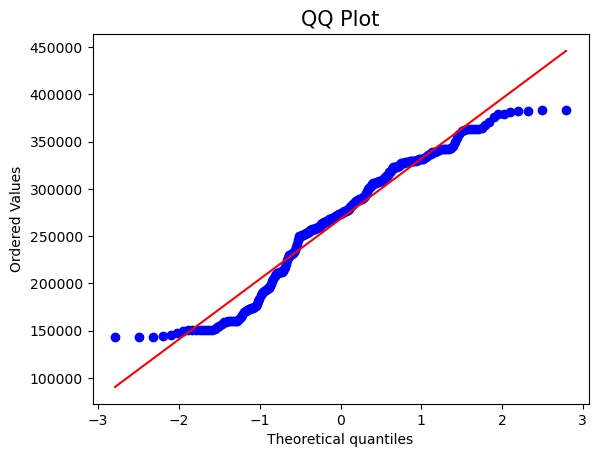

In [232]:
# Check if the time series follow the normal distribution
scipy.stats.probplot(df_bl.HousingValue, plot=pylab)
plt.title("QQ Plot", size = 15)
pylab.show()

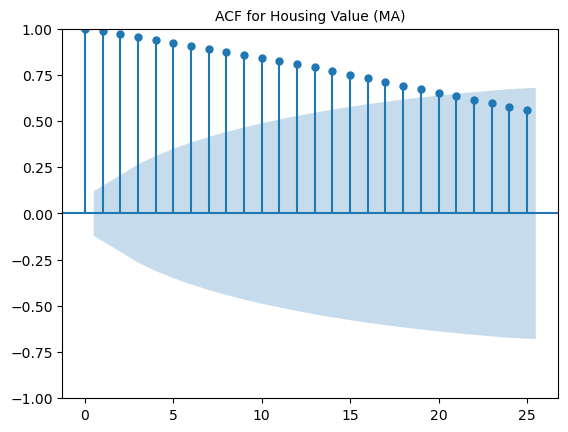

In [114]:
# ACF plot
plot_acf(df_bl);
plt.title('ACF for Housing Value (MA)', size =10)
plt.show()

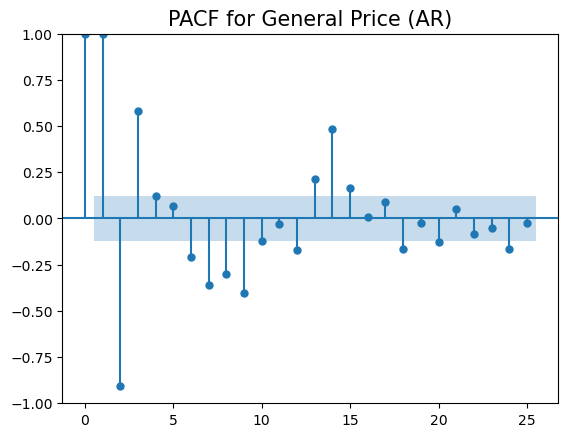

In [115]:
# PACF plot
plot_pacf(df_bl, method='ols');
plt.title('PACF for General Price (AR)', size=15)
plt.show()

In [116]:
# Check the stationarity
adf_test = adfuller(df_bl.HousingValue) #squeeze to get rid of 1 dimension
print('\nADF Statistic: {:.6f}'.format(adf_test[0]) )
print('p-value: {:.6f}'.format(adf_test[1]))
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t{:>3s}: {:.3f}'.format(key, value))   

if adf_test[1] <= 0.05:
    print("\n** Reject the null hypothesis. Data has no unit root and is stationary **")
else:
    print("\n** Fail to reject the null hypothesis. Data has unit root and is non-stationary **")


ADF Statistic: -1.597611
p-value: 0.484794
Critical Values:
	 1%: -3.457
	 5%: -2.873
	10%: -2.573

** Fail to reject the null hypothesis. Data has unit root and is non-stationary **


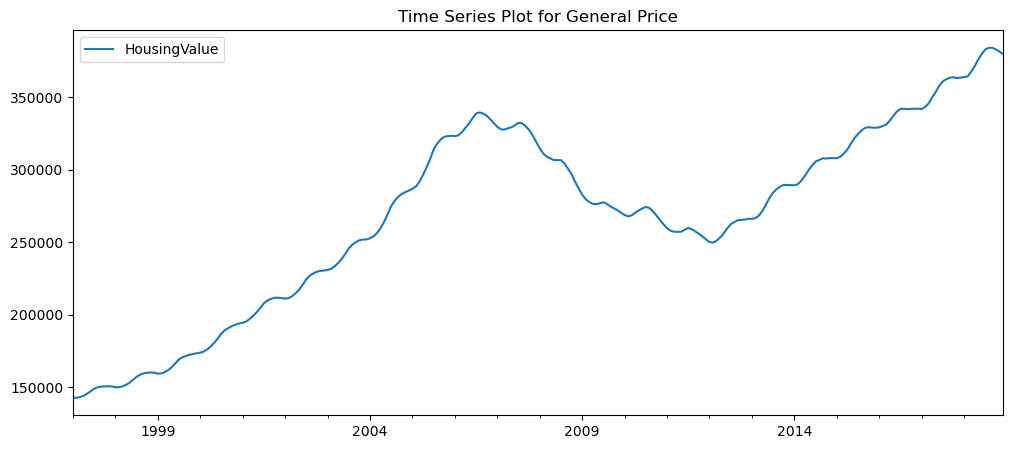

In [117]:
df_bl.plot(figsize=(12,5), title='Time Series Plot for General Price');
plt.show()

In [118]:
shift_1=df_bl.shift(1)
AR_df=pd.concat([df_bl,shift_1], axis=1)
AR_df=AR_df[1:]
AR_df.columns=['Actual_Price','Forecaset_Price']
mse = mean_squared_error(AR_df.Actual_Price,AR_df.Forecaset_Price)
rmse=sqrt(mse)
print('The baseline RMSE: {:.3f}'.format(rmse))

The baseline RMSE: 2230.893


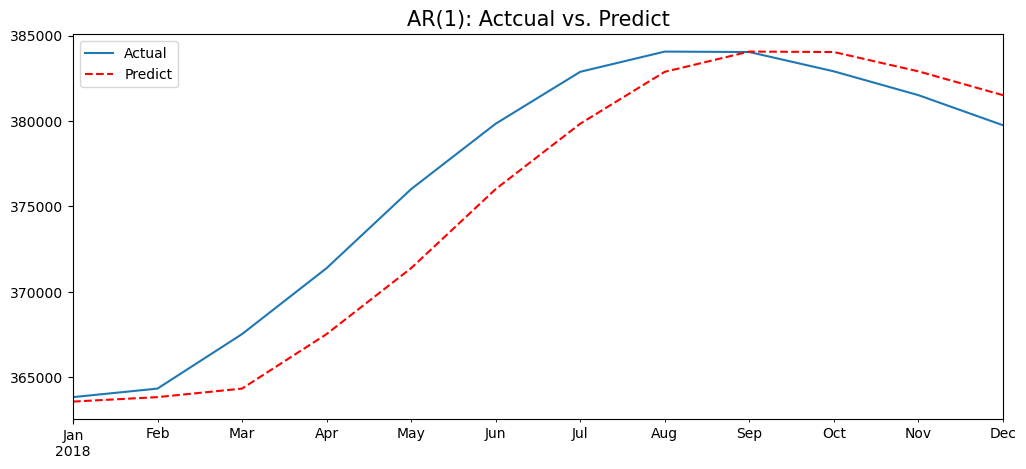

In [119]:
AR_df.Actual_Price[1:]['2018'].plot(figsize=(12,5), label='Actual');
AR_df.Forecaset_Price['2018'].plot(figsize=(12,5), label='Predict', color='red', style='--');
plt.title('AR(1): Actcual vs. Predict', size=15)
plt.legend()
plt.show()

In [57]:
train = df_bl['1997':'2017']
print('Train shape: {}'.format(train.shape))
test = df_bl['2018']
print('Train shape: {}'.format(test.shape))
start_date = '2018-01-01'
end_date = '2018-12-01'

Train shape: (252, 1)
Train shape: (12, 1)


In [58]:
# Build parameters for grid search
import itertools
p_values=range(0,10)
d_values=range(0,3)
q_values=range(0,6)
pdq=list(itertools.product(p_values,d_values,q_values))
len(pdq)

180

Shape: (264, 1)


In [59]:
import warnings
warnings.filterwarnings('ignore')
best_score=None
for parameter in pdq:
    try:
        model_arima = sm.tsa.ARIMA(train, order=parameter)
        model_arima_fit=model_arima.fit()
        predictions = model_arima_fit.forecast(steps=len(test))[0]
        predictions = model_arima_fit.predict(start= start_date, end= end_date) # store only the predictions
        mse=mean_squared_error(test, predictions)
        from math import sqrt
        rmse = sqrt(mse)
        print('ARIMA{}, RMSE={}'.format(parameter,round(rmse,4)))
    except:
        continue

ARIMA(0, 0, 0), RMSE=113669.462
ARIMA(0, 0, 1), RMSE=110867.6064
ARIMA(0, 0, 2), RMSE=108925.3128
ARIMA(0, 0, 3), RMSE=106331.0879
ARIMA(0, 0, 4), RMSE=104557.3073
ARIMA(0, 0, 5), RMSE=101281.7462
ARIMA(0, 1, 0), RMSE=14902.1574
ARIMA(0, 1, 1), RMSE=14879.6401
ARIMA(0, 1, 2), RMSE=14891.4062
ARIMA(0, 1, 3), RMSE=14901.507
ARIMA(0, 1, 4), RMSE=14903.155
ARIMA(0, 1, 5), RMSE=14905.051
ARIMA(0, 2, 0), RMSE=12556.8672
ARIMA(0, 2, 1), RMSE=12411.189
ARIMA(0, 2, 2), RMSE=12338.5479
ARIMA(0, 2, 3), RMSE=12378.9907
ARIMA(0, 2, 4), RMSE=12283.1226
ARIMA(0, 2, 5), RMSE=11387.1594
ARIMA(1, 0, 0), RMSE=15054.092
ARIMA(1, 0, 1), RMSE=14104.4091
ARIMA(1, 0, 2), RMSE=13076.439
ARIMA(1, 0, 3), RMSE=12690.9498
ARIMA(1, 0, 4), RMSE=12926.8101
ARIMA(1, 0, 5), RMSE=11384.7182
ARIMA(1, 1, 0), RMSE=14878.7724
ARIMA(1, 1, 1), RMSE=11244.9572
ARIMA(1, 1, 2), RMSE=11170.4621
ARIMA(1, 1, 3), RMSE=13639.5732
ARIMA(1, 1, 4), RMSE=9917.9004
ARIMA(1, 1, 5), RMSE=13839.5952
ARIMA(1, 2, 0), RMSE=12402.6552
ARIMA(1, 2

1.ARIMA(5, 0, 5) with RMSE=1184.0138

2.ARIMA(4, 0, 5) with RMSE=1208.1623

3.ARIMA(7, 0, 2) with RMSE=1243.3179

4.ARIMA(4, 0, 3) with RMSE=1429.4331

5.ARIMA(9, 0, 2), RMSE=1561.7583


In [60]:
# Build a Automation of ARIMA validation for the following models
def ARIMA_validation1(AR, I, MA, train, test):
    '''
    Expect: p(AR),d(I),q(MA), training_set, test_set
    Modifies: N/A
    Returns: 1. ACF plot            
             2. PACF plot
             3. RMSE
             4. Line plot for Actual vs. Predicted
             5. Model summary
             6. Line Plot of the Residual Errors
             7. Density Plot of the Residual Errors
             8. Residual Errors Statistics
    '''

   

    arima_order = (AR, I, MA)
    print('ARIMA{}\n'.format(arima_order))

    # ACF plot
    plot_acf(train);
    plt.title('ACF for General Price (MA)', size=15)
    plt.show()

    # PACF plot
    plot_pacf(train, method='ols');
    plt.title('PACF for General Price (AR)', size=15)
    plt.show()

    # ARIMA model
    model = sm.tsa.ARIMA(train, order=arima_order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=start_date, end=end_date)

    # RMSE
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    print('{:5}: {}'.format('RMSE', round(rmse, 4)))

    # Plotting
    test.plot(figsize=(12, 5), label='Actual')
    predictions.plot(figsize=(12, 5), label='Predict', color='red', style='--')
    plt.title('Actual vs. Predicted', size=15)
    plt.legend()
    plt.show()

    # Summary
    print(model_fit.summary())

    # Residual
    model_fit.resid.plot(title='Line Plot of the Residual Errors')
    plt.show()
    model_fit.resid.plot(kind='kde', title='Density Plot of the Residual Errors')
    plt.show()
    print('Residual Errors Statistics:')
    print(model_fit.resid.describe())


ARIMA(7, 0, 2)



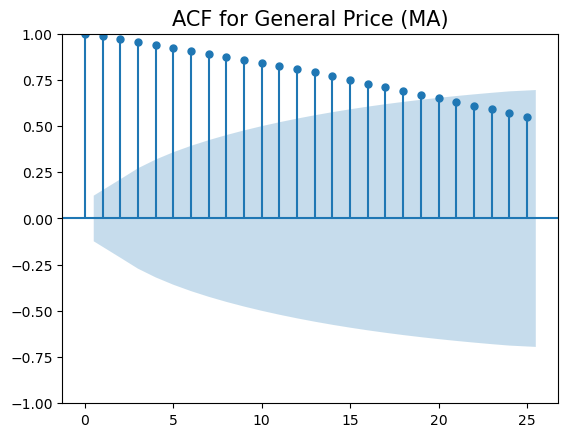

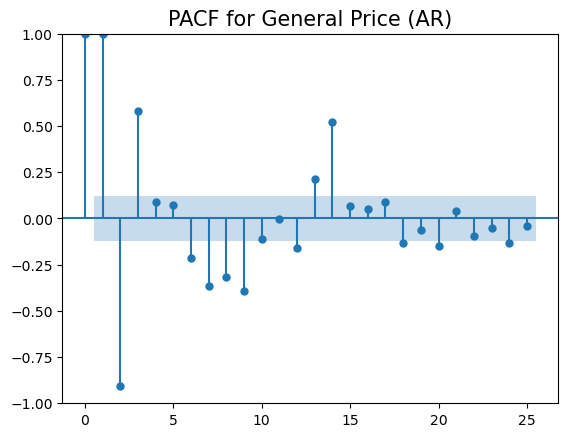

RMSE : 1243.3179


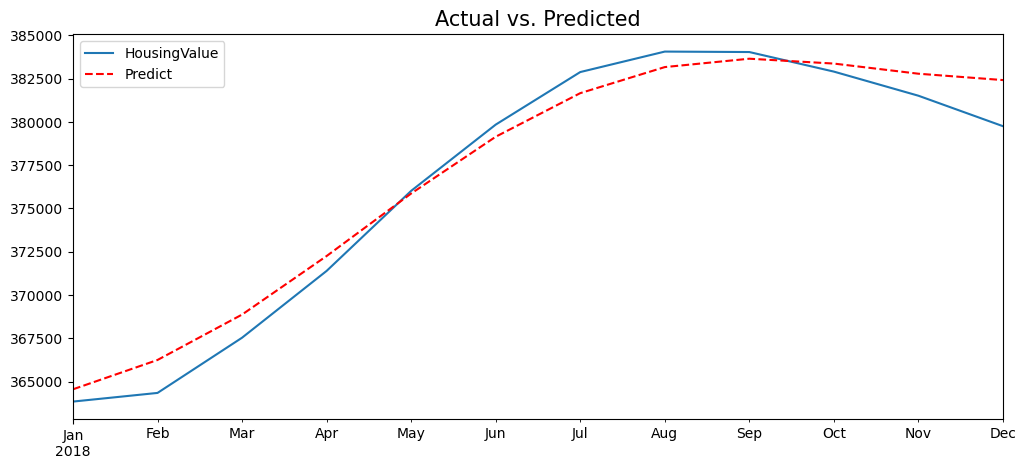

                               SARIMAX Results                                
Dep. Variable:           HousingValue   No. Observations:                  252
Model:                 ARIMA(7, 0, 2)   Log Likelihood               -1945.887
Date:                Tue, 16 May 2023   AIC                           3913.774
Time:                        17:14:40   BIC                           3952.598
Sample:                    01-01-1997   HQIC                          3929.396
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+05    2.3e-07   1.14e+12      0.000    2.63e+05    2.63e+05
ar.L1          3.4680      0.119     29.097      0.000       3.234       3.702
ar.L2         -4.8906      0.415    -11.787      0.0

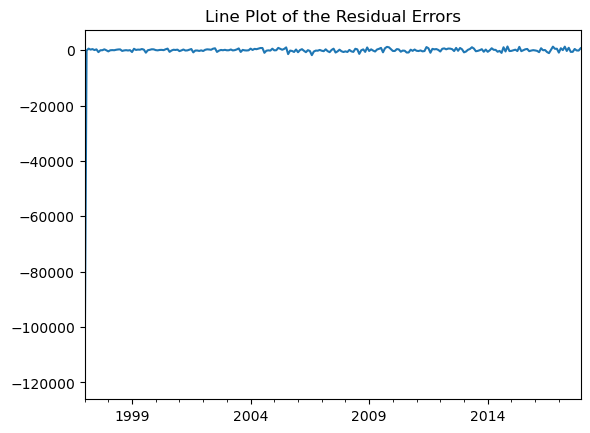

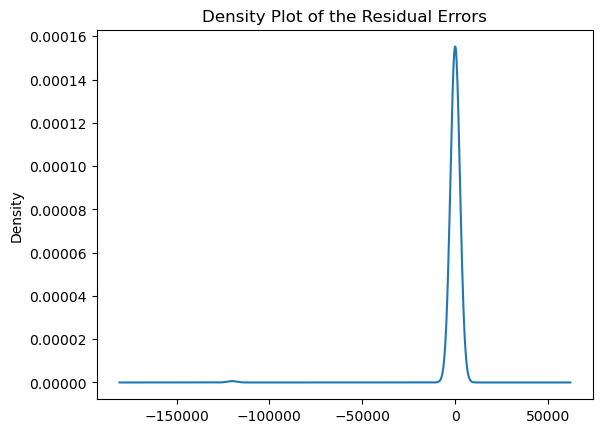

Residual Errors Statistics:
count       252.000000
mean       -438.197377
std        7581.033212
min     -120040.932739
25%        -271.959187
50%          21.140117
75%         330.014539
max        1354.360450
dtype: float64


In [61]:
# prediction
ARIMA_validation1(7,0,2, train, test)

ARIMA(4, 0, 3)



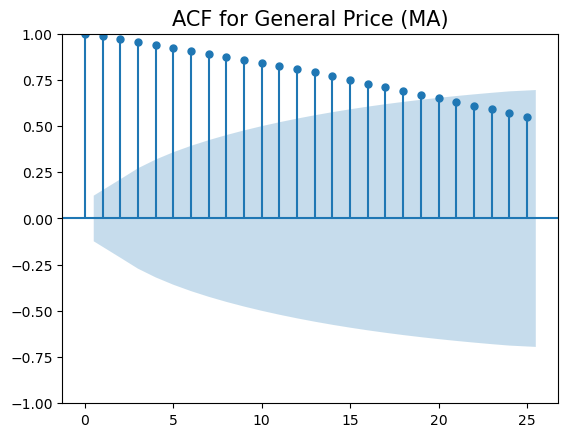

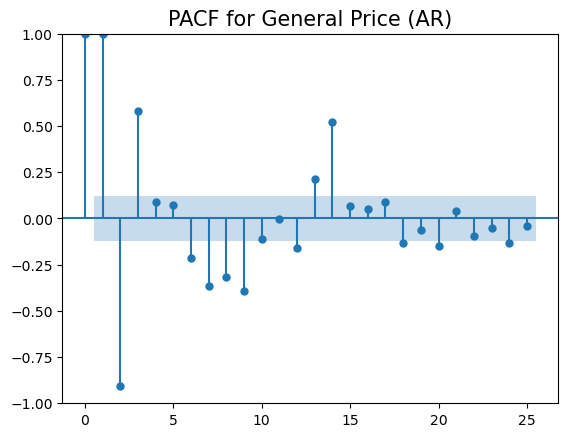

RMSE : 1429.4331


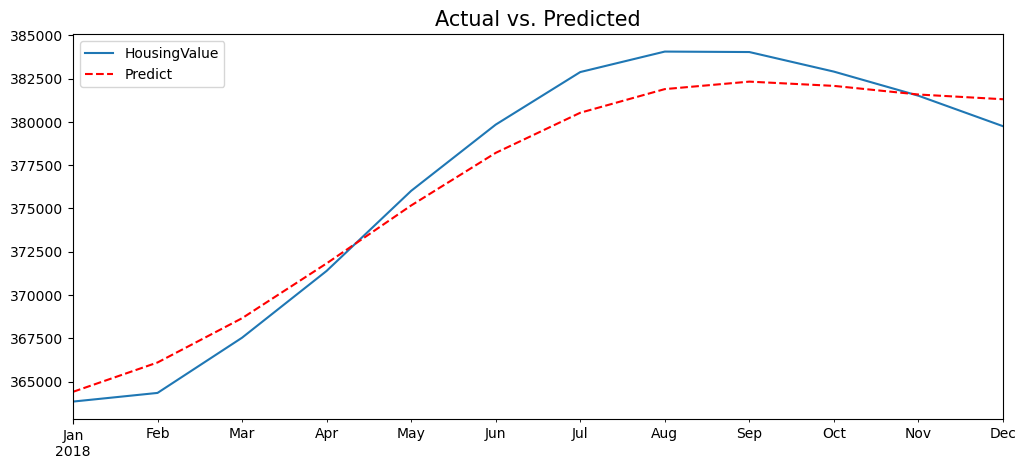

                               SARIMAX Results                                
Dep. Variable:           HousingValue   No. Observations:                  252
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -1960.649
Date:                Tue, 16 May 2023   AIC                           3939.297
Time:                        17:14:42   BIC                           3971.062
Sample:                    01-01-1997   HQIC                          3952.079
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+05   7.65e-08   3.44e+12      0.000    2.63e+05    2.63e+05
ar.L1          3.7231      0.007    508.799      0.000       3.709       3.737
ar.L2         -5.4403      0.021   -261.437      0.0

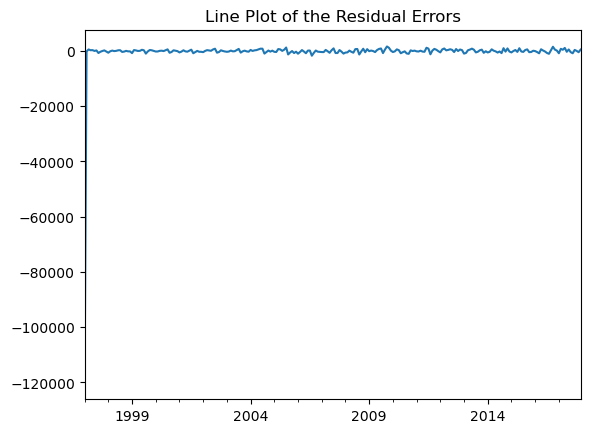

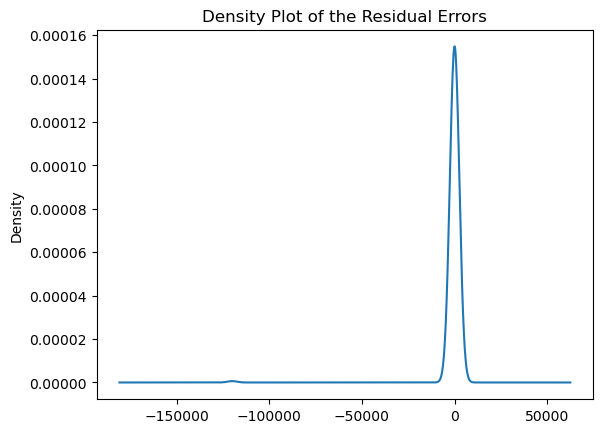

Residual Errors Statistics:
count       252.000000
mean       -464.145224
std        7581.263756
min     -120040.932758
25%        -344.631541
50%           8.568934
75%         342.953357
max        1650.666148
dtype: float64


In [62]:
# prediction
ARIMA_validation1(4,0,3, train, test)

ARIMA(5, 0, 5)



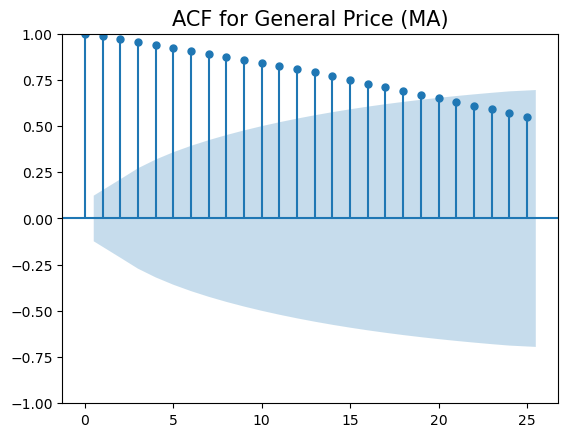

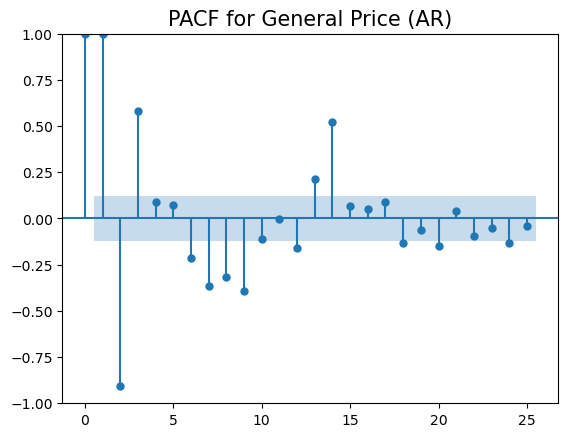

RMSE : 1184.0138


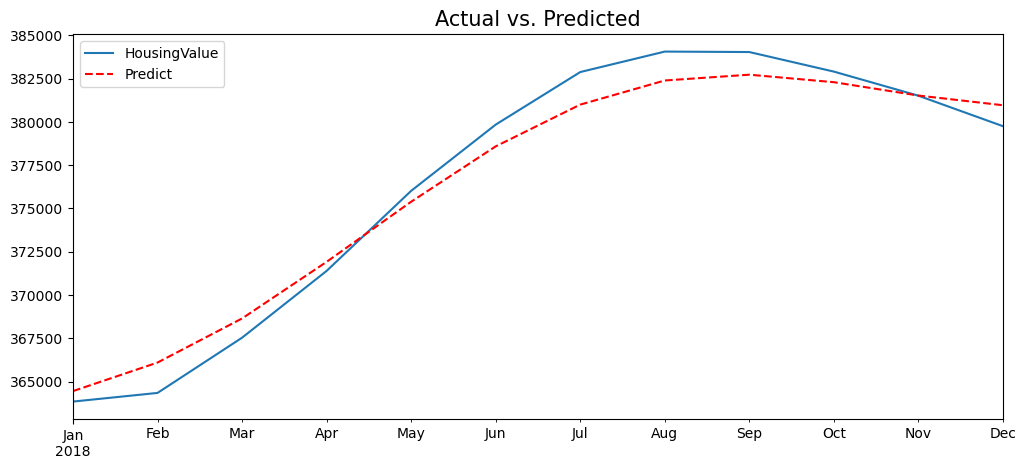

                               SARIMAX Results                                
Dep. Variable:           HousingValue   No. Observations:                  252
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1944.567
Date:                Tue, 16 May 2023   AIC                           3913.135
Time:                        17:14:44   BIC                           3955.488
Sample:                    01-01-1997   HQIC                          3930.177
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+05   1.11e-06   2.38e+11      0.000    2.63e+05    2.63e+05
ar.L1          2.8600      0.468      6.113      0.000       1.943       3.777
ar.L2         -2.2533      1.731     -1.301      0.1

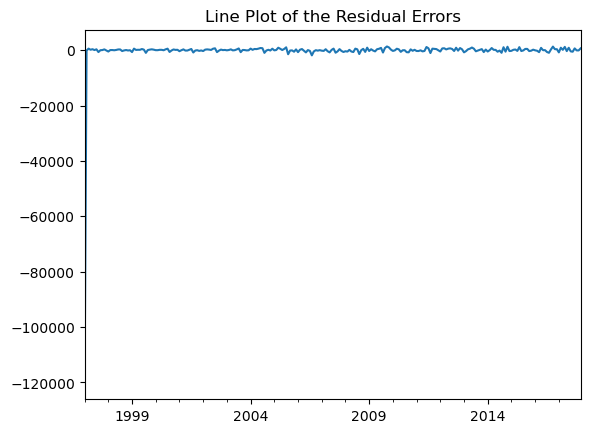

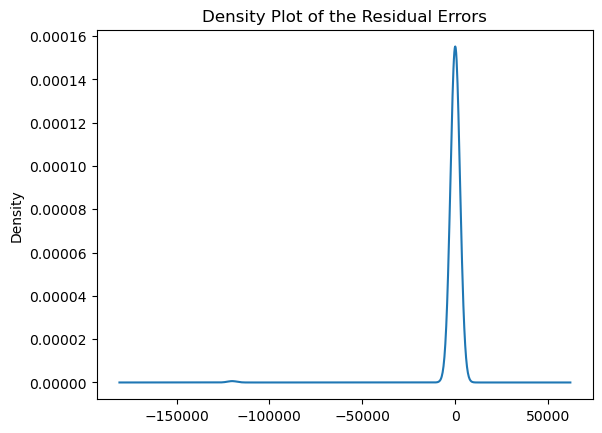

Residual Errors Statistics:
count       252.000000
mean       -441.135792
std        7581.190455
min     -120040.932737
25%        -272.699903
50%          37.184687
75%         339.208426
max        1330.567222
dtype: float64


In [63]:
# prediction
ARIMA_validation1(5,0,5, train, test)

ARIMA(9, 0, 2)



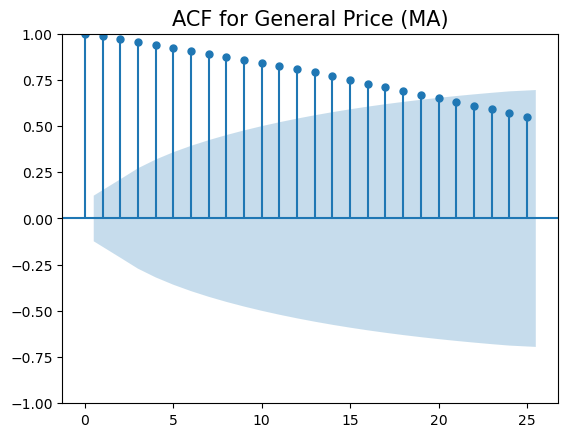

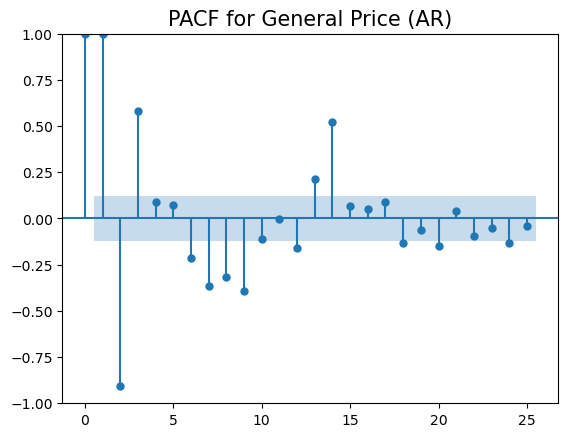

RMSE : 1561.7583


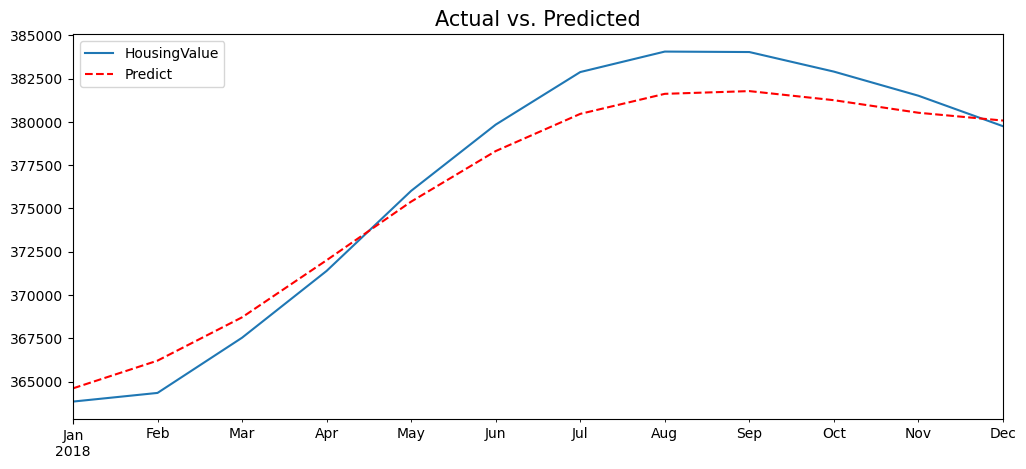

                               SARIMAX Results                                
Dep. Variable:           HousingValue   No. Observations:                  252
Model:                 ARIMA(9, 0, 2)   Log Likelihood               -1943.356
Date:                Tue, 16 May 2023   AIC                           3912.712
Time:                        17:14:46   BIC                           3958.594
Sample:                    01-01-1997   HQIC                          3931.174
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.631e+05   3.45e-06   7.62e+10      0.000    2.63e+05    2.63e+05
ar.L1          3.3269      0.126     26.483      0.000       3.081       3.573
ar.L2         -4.6437      0.372    -12.483      0.0

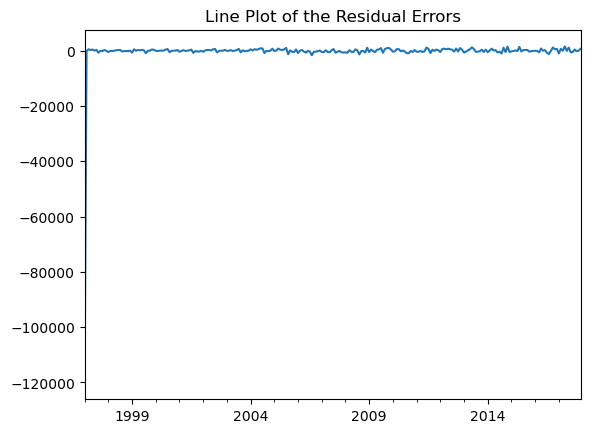

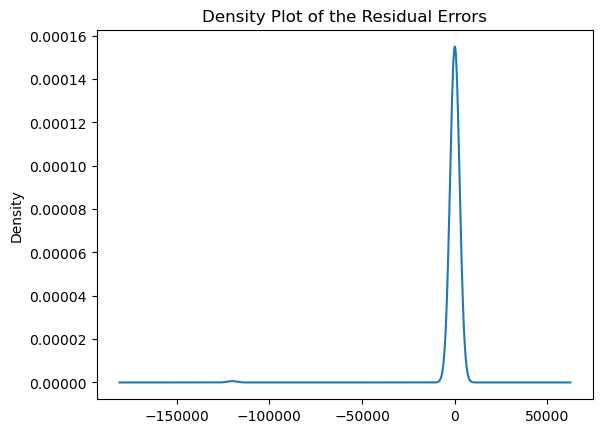

Residual Errors Statistics:
count       252.000000
mean       -427.485393
std        7582.799372
min     -120040.932938
25%        -305.539834
50%          25.445315
75%         386.529051
max        1556.363874
dtype: float64


In [64]:
# prediction
ARIMA_validation1(9, 0, 2, train, test)

In [65]:
##### # Simple ARIMA model
model = sm.tsa.ARIMA(train, order=(5,0,5))
model_fit = model.fit()
predictions = model_fit.predict(start=start_date, end=end_date)


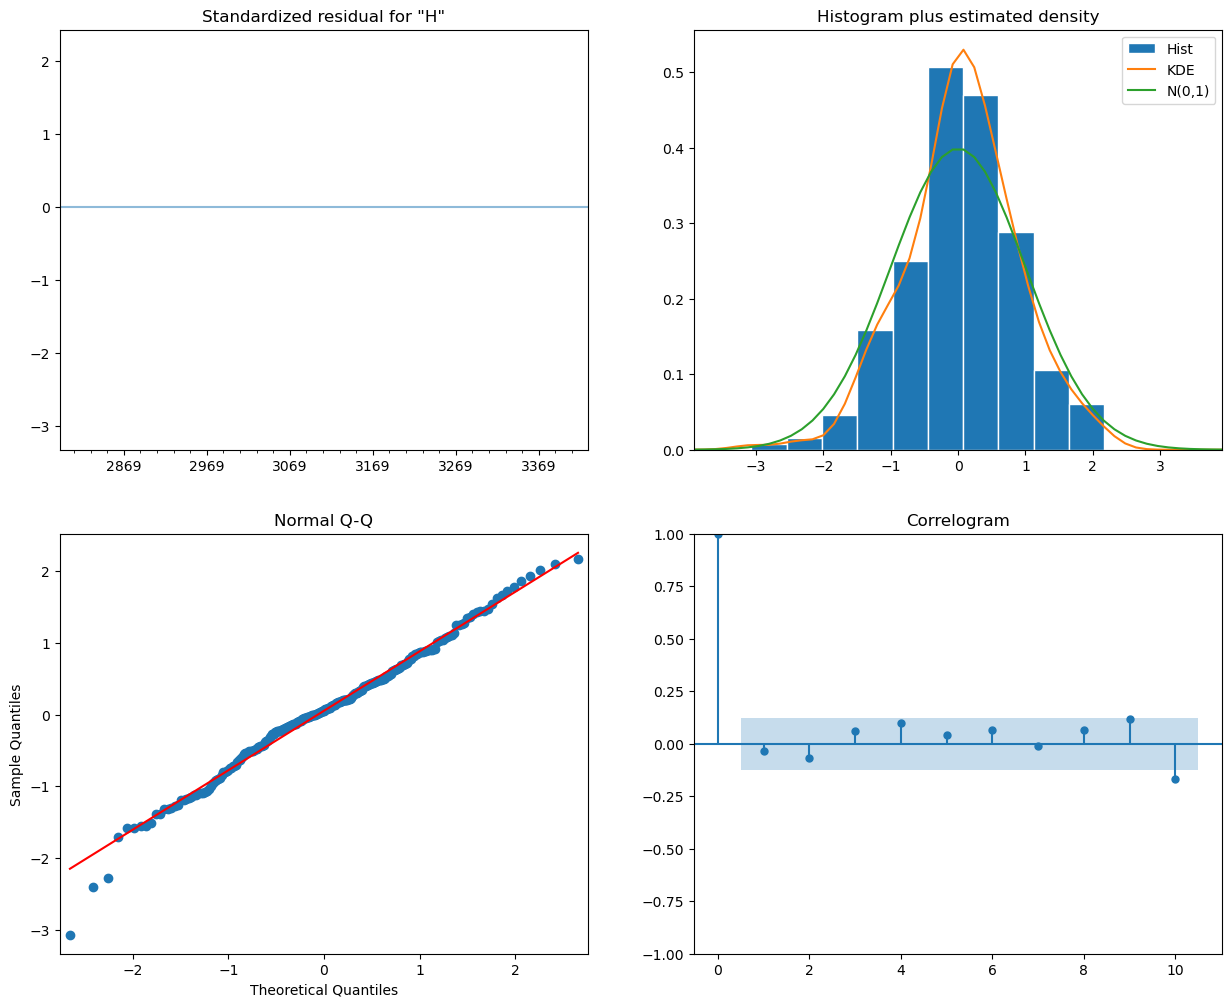

In [268]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [67]:
pred = model_fit.get_prediction(start=pd.to_datetime('2018-01'),end=pd.to_datetime('2030-12'), dynamic=False)
pred_ci = pred.conf_int()

In [68]:
pred_ci.iloc[:, 0]

2018-01-01    363245.326490
2018-02-01    363487.997665
2018-03-01    364531.868276
2018-04-01    366166.088558
2018-05-01    367875.257763
2018-06-01    369259.155923
2018-07-01    369844.424379
2018-08-01    369449.272087
2018-09-01    368038.874139
2018-10-01    365900.102503
2018-11-01    363428.712743
2018-12-01    361135.377290
2019-01-01    359410.133927
2019-02-01    358496.563550
2019-03-01    358358.427012
2019-04-01    358749.262242
2019-05-01    359232.276891
2019-06-01    359341.276553
2019-07-01    358672.295394
2019-08-01    357023.189656
2019-09-01    354424.358106
2019-10-01    351153.090819
2019-11-01    347641.717990
2019-12-01    344376.010304
2020-01-01    341750.675072
2020-02-01    339973.234969
2020-03-01    338999.439618
2020-04-01    338554.572959
2020-05-01    338202.980565
2020-06-01    337472.798742
2020-07-01    335979.418688
2020-08-01    333533.683647
2020-09-01    330189.817606
2020-10-01    326233.952825
2020-11-01    322104.558213
2020-12-01    318275

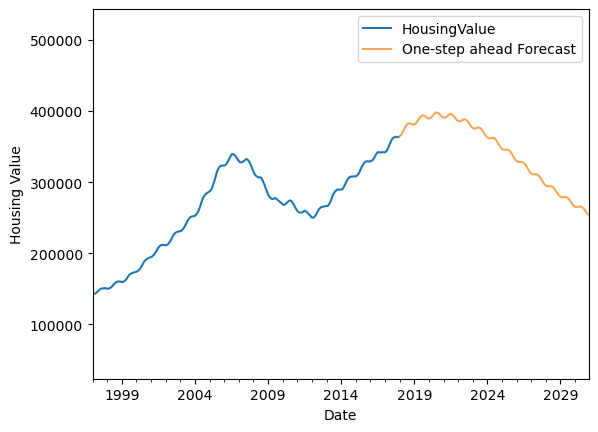

In [69]:
# subset the data from 1990
ax = train['1997-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Housing Value')
plt.legend()

plt.show()

In [70]:
preddynamic = model_fit.get_prediction(start=pd.to_datetime('2018-01'),end=pd.to_datetime('2030-12'), dynamic=False,full_results=True)
preddynamic_ci = preddynamic.conf_int()

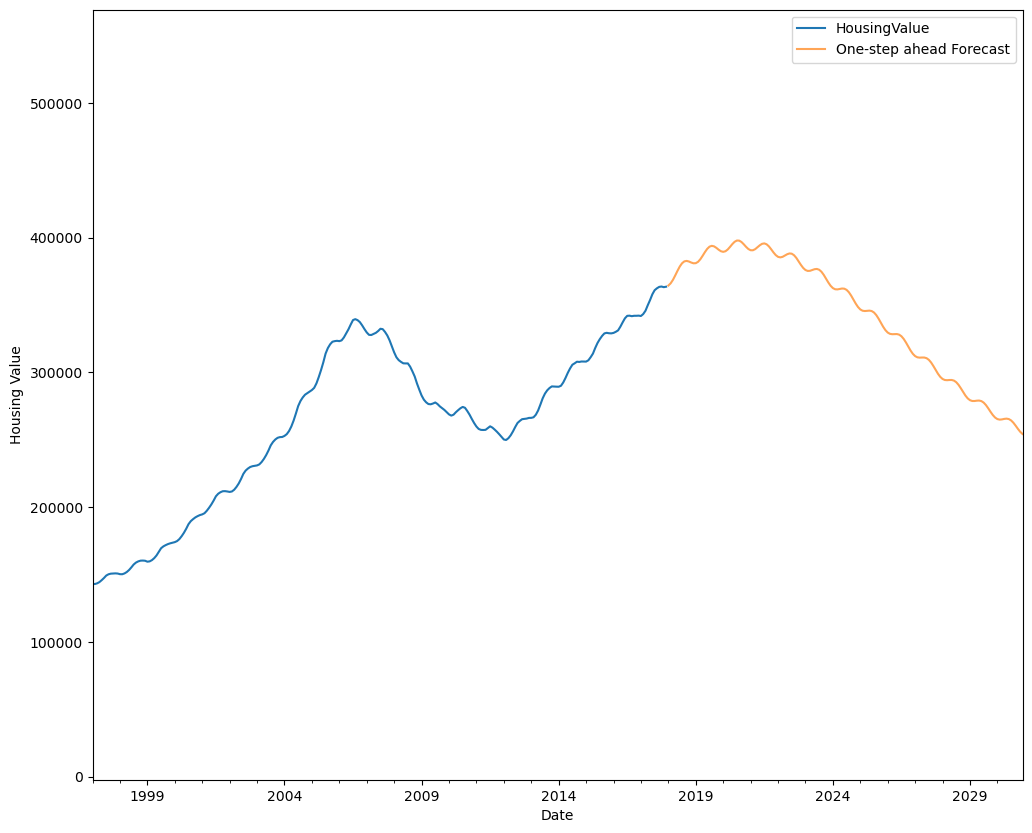

In [71]:
# subset the data from 1990
ax = train['1997-01':].plot(label='observed', figsize=(12, 10))
preddynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(preddynamic_ci.index,
                preddynamic_ci.iloc[:, 0],
                preddynamic_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), train.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Value')
plt.legend()

plt.show()

In [72]:
# Get forecast 500 steps ahead in future
pred_uc = model_fit.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

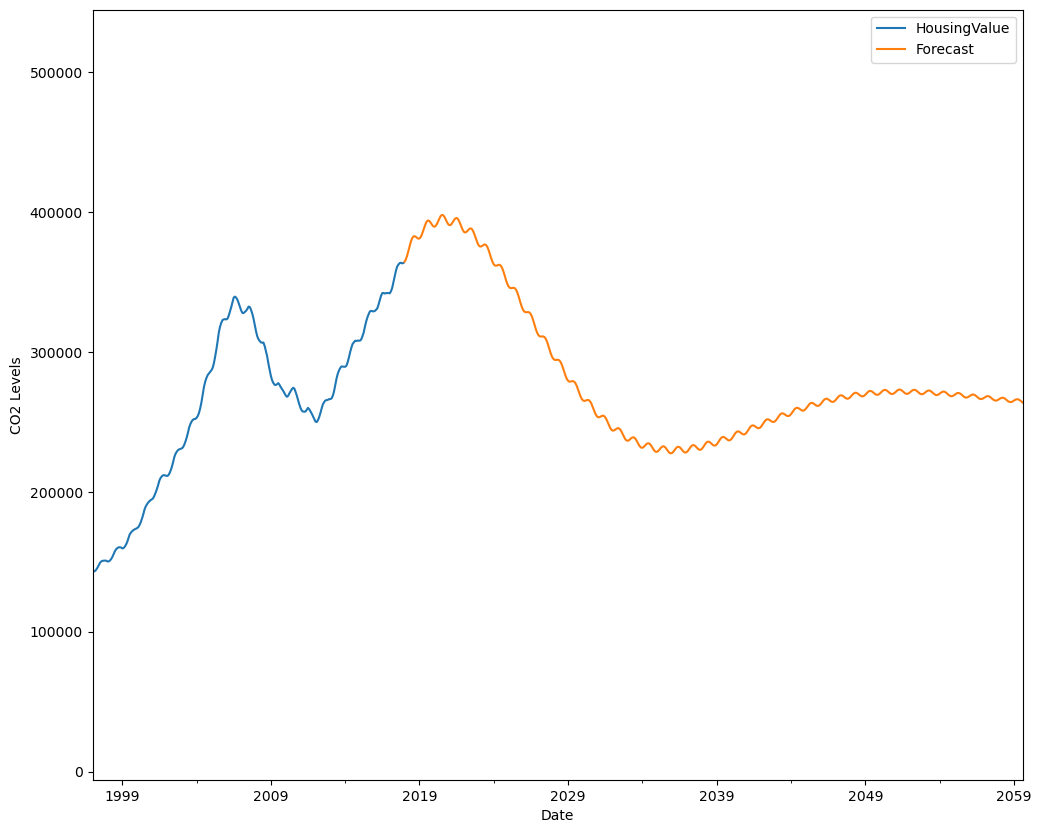

In [73]:
ax = train.plot(label='observed', figsize=(12, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [125]:
zw

,RegionID,SizeRank,ZipCode,State,City,Metro,CountyName,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,...,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,County Name,State Abbreviation,Rate
0,61148,0,08701,NJ,Lakewood,New York-Newark-Jersey City,ocean county,132679.641460,133684.336013,134014.195729,134390.373332,135927.453172,137380.302467,138527.055837,139310.927851,139313.849892,139518.374740,139993.148384,140199.759694,139449.113217,139858.520944,139093.948535,138314.815264,139023.453573,140294.027262,...,5.053713e+05,5.147401e+05,5.232062e+05,5.331825e+05,5.422762e+05,5.476948e+05,5.616502e+05,5.737367e+05,5.864363e+05,5.999632e+05,6.126433e+05,6.282888e+05,6.346629e+05,6.370550e+05,6.390613e+05,6.422005e+05,6.464018e+05,6.441222e+05,6.447250e+05,6.502063e+05,6.593674e+05,6.700311e+05,ocean county,NJ,3.7
1,91982,1,77494,TX,Katy,Houston-The Woodlands-Sugar Land,fort bend county,190056.714417,190101.400932,193154.305032,198602.933532,200586.899141,203547.810778,208119.913877,212212.841536,214278.594476,211766.568669,210447.390777,208022.993136,205829.368919,206060.700409,204833.264900,205380.598735,205471.128010,206728.968411,...,4.456120e+05,4.504513e+05,4.538670e+05,4.579227e+05,4.634266e+05,4.677297e+05,4.762375e+05,4.849561e+05,4.943275e+05,5.032451e+05,5.123598e+05,5.193485e+05,5.197400e+05,5.161626e+05,5.124367e+05,5.089513e+05,5.053932e+05,5.004861e+05,4.973688e+05,4.990536e+05,5.031691e+05,5.079373e+05,fort bend county,TX,3.9
2,91940,2,77449,TX,Katy,Houston-The Woodlands-Sugar Land,harris county,110834.182195,110827.229829,111048.052822,111284.579045,111369.890300,111760.685488,111498.383367,111214.635200,111481.090184,111701.626146,111378.029974,111470.877591,113004.444043,113281.499850,113547.641780,113842.233763,113942.944619,113849.647440,...,2.436156e+05,2.453983e+05,2.478446e+05,2.506499e+05,2.536180e+05,2.568691e+05,2.628260e+05,2.689596e+05,2.743591e+05,2.790464e+05,2.831509e+05,2.871953e+05,2.883560e+05,2.872654e+05,2.862682e+05,2.843756e+05,2.819623e+05,2.792785e+05,2.769994e+05,2.761339e+05,2.769872e+05,2.775097e+05,harris county,TX,4.2
3,92593,4,78660,TX,Pflugerville,Austin-Round Rock-Georgetown,travis county,177798.427926,178623.923264,179577.868921,180182.708000,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.161120,179943.948316,180790.621203,...,4.274811e+05,4.276238e+05,4.266890e+05,4.271086e+05,4.303756e+05,4.351305e+05,4.440341e+05,4.544320e+05,4.674230e+05,4.798906e+05,4.864056e+05,4.878590e+05,4.813669e+05,4.728861e+05,4.634734e+05,4.549067e+05,4.454434e+05,4.367237e+05,4.329603e+05,4.310121e+05,4.306347e+05,4.315247e+05,travis county,TX,2.8
4,62093,5,11385,NY,New York,New York-Newark-Jersey City,queens county,175560.749897,177489.167697,177450.627375,178906.045121,177515.919516,178440.296989,179319.128636,179738.979672,181338.594305,183919.852292,185477.620353,185941.468029,188276.480376,187357.253749,186603.609710,187083.229822,187538.708681,189677.907001,...,7.496278e+05,7.505467e+05,7.543534e+05,7.584507e+05,7.632640e+05,7.629584e+05,7.614545e+05,7.601083e+05,7.662684e+05,7.723069e+05,7.841335e+05,7.987155e+05,7.989614e+05,7.988396e+05,7.961248e+05,7.937141e+05,7.945753e+05,7.877761e+05,7.884405e+05,7.869105e+05,7.877890e+05,7.873066e+05,queens county,NY,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,69057,39809,26544,WV,Maidsville,Morgantown,monongalia county,42460.191779,42259.250859,44587.397421,45425.811916,47185.129694,47775.300753,49184.317077,50683.344996,51261.207121,50702.236313,5152

In [132]:
columns_list = zw.columns.tolist()

print(columns_list)

['RegionID', 'SizeRank', 'ZipCode', 'State', 'City', 'Metro', 'CountyName', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', 

In [151]:
print(df_invest1.head())
#d=df_invest.T

  ZipCode        1997-01        1997-02        1997-03        1997-04  \
0   78660  177798.427926  178623.923264  179577.868921  180182.708000   
1   30044  144115.338576  144248.421421  144627.336140  145351.173764   
2   37013  120440.809383  120601.559646  121229.944813  121882.707295   
3   94565  142931.748208  142897.098069  139843.973491  139954.744217   
4   92683  200561.132531  199009.982913  200957.901004  203470.763104   

         1997-05        1997-06        1997-07        1997-08        1997-09  \
0  181342.205168  181815.374484  182518.292777  182750.633842  182251.429545   
1  146156.880045  147222.246668  148058.088069  148720.147382  149134.710238   
2  122645.832991  123080.201133  123516.639121  123330.848468  123355.827945   
3  139984.951160  140209.732071  144718.665106  145495.487356  145644.543059   
4  204253.488762  207082.495218  209240.764107  208643.447643  209544.246286   

         1997-10        1997-11        1997-12        1998-01        1998-02  \


In [ ]:
predictions = model_arima_fit.predict(start= start_date, end = end_date)

        # RMSE
        mse=mean_squared_error(zip_test, predictions)
        rmse = sqrt(mse)
        zipcode.append(z)
        RMSE.append(rmse)
        print('{}. Zipcode:{}, RMSE={}'.format(i, z,round(rmse,4)))
    except:
        continue

In [153]:
df_invest[(df_invest['ZipCode']=='78660')]

,ZipCode,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,78660,177798.427926,178623.923264,179577.868921,180182.708,181342.205168,181815.374484,182518.292777,182750.633842,182251.429545,181533.805257,180755.548053,180533.784745,179116.817949,178938.645211,179192.756624,178971.16112,179943.948316,180790.621203,181753.105132,181712.408378,181122.711992,179996.061904,179277.706222,178850.028273,...,397296.95472,410530.538246,423473.592825,427481.144653,427623.785827,426688.98005,427108.591887,430375.63728,435130.535585,444034.091606,454431.976354,467422.964876,479890.578523,486405.606048,487859.006179,481366.88269,472886.107936,463473.430197,454906.689792,445443.384458,436723.730092,432960.333828,431012.118172,430634.731117,431524.682777


In [154]:
temp_df = df_invest[(df_invest['ZipCode']=='78660')].copy()
temp_df = temp_df.iloc[:,1:]
df_ts = temp_df.T.rename(columns={0:'78660'})
df_ts.index=pd.to_datetime(df_ts.index)

# How many row do we have ? 
# Supposely it should be 265-1 =264
df_ts.shape

(316, 1)

In [155]:
# create a zipcode tuple
zip_tuple = tuple(df_invest1.ZipCode.values[0:]) # remove the first zipcode, 78660, in the tuple

# How many zipcode?
len(zip_tuple)

6851

In [156]:
temp_dfs = []

for z in zip_tuple:
    temp_df = df_invest[df_invest['ZipCode'] == z]
    temp_df = temp_df.iloc[:, 0:]
    temp_df_ts = temp_df.T.rename(columns={temp_df.columns[0]: z})
    temp_dfs.append(temp_df_ts)

df_ts = pd.concat(temp_dfs, axis=1)


In [157]:
df_ts = df_ts.rename_axis(None, axis=1)

In [158]:
print(df_ts)

                  0              1              2              3     \
ZipCode          78660          30044          37013          94565   
1997-01  177798.427926  144115.338576  120440.809383  142931.748208   
1997-02  178623.923264  144248.421421  120601.559646  142897.098069   
1997-03  179577.868921   144627.33614  121229.944813  139843.973491   
1997-04     180182.708  145351.173764  121882.707295  139954.744217   
...                ...            ...            ...            ...   
2022-12  436723.730092  358747.394209  365756.106946  580263.121898   
2023-01  432960.333828  355832.079084  362764.768205  574357.308264   
2023-02  431012.118172  355248.882533  361316.624683  573463.764041   
2023-03  430634.731117   357358.57029  362673.644054  576205.145456   
2023-04  431524.682777  360855.801823  364341.692527  581881.828728   

                  4              5              6              7     \
ZipCode          92683          78613          91911          92804   
1997-

In [159]:
df_ts.columns = df_ts.iloc[0]
df_ts = df_ts.iloc[1:]
df_ts

ZipCode,78660,30044,37013,94565,92683,78613,91911,92804,92154,30043,94112,85142,30024,95035,22193,28269,27610,96706,92704,76063,94544,78641,28027,98012,34787,...,45358,80469,55085,14545,12574,45328,12007,12174,20765,98224,80623,34138,73557,46977,14592,43740,11970,73491,43467,13020,14134,26544,95419,14415,22722
1997-01,177798.427926,144115.338576,120440.809383,142931.748208,200561.132531,212439.546126,144800.939069,163411.162093,146345.720367,176727.731936,227199.803802,122503.295292,224605.877243,267364.645384,158728.534076,141505.876514,134804.251819,231054.387159,169393.398589,162487.336586,181705.704196,185822.503764,170846.588842,238305.208874,154971.458693,...,88598.038062,56084.18081,113426.610573,60406.232799,81339.622053,67884.354999,126421.949057,57012.850161,206911.816258,98836.732258,116598.993033,134236.4847,70134.228326,45483.750738,87267.615524,82450.889551,136976.041477,41359.735988,67270.192438,55773.125378,69639.429858,42460.191779,138235.78765,91353.368521,124819.509529
1997-02,178623.923264,144248.421421,120601.559646,142897.098069,199009.982913,212598.916756,144373.041359,161663.726141,145544.386137,176844.59824,229337.435084,123649.106739,224427.638188,271100.056886,158088.121419,142378.161867,135261.081992,229482.590941,167933.102302,162699.565081,182082.1676,186319.076624,171484.103984,239571.994925,154638.253681,...,89100.572895,56285.494723,112722.817176,59601.467115,80958.331346,68333.239901,125837.520368,56870.943999,206645.432072,99127.870965,116994.574556,132624.328998,68825.084414,45467.911655,87111.682189,84211.03895,136196.814892,41241.395522,65408.817411,55532.347541,66682.583709,42259.250859,140154.592056,91449.266674,124613.433323
1997-03,179577.868921,144627.33614,121229.944813,139843.973491,200957.901004,214482.862872,144648.965204,163213.570474,145446.720508,177085.381394,231650.565334,125177.876312,224514.026904,276721.667054,158489.306662,143231.309884,135685.634667,228172.750534,169525.911962,163416.944096,182758.521125,189086.725001,172952.543845,241100.658466,156173.533685,...,89012.85098,56949.311508,112742.492192,59448.320747,81921.290852,68919.736492,122430.22445,56743.13822,205164.185279,101079.89468,117887.987518,130341.971944,69078.895486,45121.270323,85833.210563,87201.418744,133083.395781,41415.923525,64730.217986,53639.488148,67007.564725,44587.397421,141191.8503,91555.125215,120365.136943
1997-04,180182.708,145351.173764,121882.707295,139954.744217,203470.763104,215678.100931,144617.555987,164749.12729,145500.800726,177693.192611,233695.333535,126917.294504,225242.135201,282856.954332,159081.539988,143971.759476,137144.430715,225890.712836,171505.177065,164135.047307,183755.506515,189756.254097,175010.396909,242846.924988,157067.320027,...,90594.723382,57429.582028,113724.118869,59027.543086,83414.046304,69785.181066,124206.248642,56503.638376,204819.305107,100195.44772,119451.408482,134095.388768,68815.726293,43365.075433,85811.885788,88867.364626,134606.278573,42094.987313,65001.626798,52887.312672,66521.93317,45425.811916,143399.451932,90371.468895,118810.322557
1997-05,181342.205168,146156.880045,122645.832991,139984.95116,204253.488762,218645.353165,144792.549698,165307.821836,146208.693313,178319.905359,236939.751721,128509.111459,227221.902779,297769.436548,160526.948293,145020.411102,138178.285591,223968.007282,172703.598753,164625.945798,185903.049369,190030.244157,176749.675539,245375.391423,157899.493628,...,92603.828153,57291.38333,116516.52664,60077.549051,85381.662825,71382.110647,127219.134307,57063.807954,205102.062992,98098.423701,121739.057485,131215.275898,68609.401017,40624.844777,87387.209539,88873.144289,138139.437314,42621.649832,63256.931675,52624.15994,66640.276404,47185.129694,142988.199611,90163.046611,122699.756586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,436723.730092,358747

In [160]:
#df_ts = df_ts.rename_axis(columns=None)
df_ts.index=pd.to_datetime(df_ts.index)


In [161]:
df_ts

ZipCode,78660,30044,37013,94565,92683,78613,91911,92804,92154,30043,94112,85142,30024,95035,22193,28269,27610,96706,92704,76063,94544,78641,28027,98012,34787,...,45358,80469,55085,14545,12574,45328,12007,12174,20765,98224,80623,34138,73557,46977,14592,43740,11970,73491,43467,13020,14134,26544,95419,14415,22722
1997-01-01,177798.427926,144115.338576,120440.809383,142931.748208,200561.132531,212439.546126,144800.939069,163411.162093,146345.720367,176727.731936,227199.803802,122503.295292,224605.877243,267364.645384,158728.534076,141505.876514,134804.251819,231054.387159,169393.398589,162487.336586,181705.704196,185822.503764,170846.588842,238305.208874,154971.458693,...,88598.038062,56084.18081,113426.610573,60406.232799,81339.622053,67884.354999,126421.949057,57012.850161,206911.816258,98836.732258,116598.993033,134236.4847,70134.228326,45483.750738,87267.615524,82450.889551,136976.041477,41359.735988,67270.192438,55773.125378,69639.429858,42460.191779,138235.78765,91353.368521,124819.509529
1997-02-01,178623.923264,144248.421421,120601.559646,142897.098069,199009.982913,212598.916756,144373.041359,161663.726141,145544.386137,176844.59824,229337.435084,123649.106739,224427.638188,271100.056886,158088.121419,142378.161867,135261.081992,229482.590941,167933.102302,162699.565081,182082.1676,186319.076624,171484.103984,239571.994925,154638.253681,...,89100.572895,56285.494723,112722.817176,59601.467115,80958.331346,68333.239901,125837.520368,56870.943999,206645.432072,99127.870965,116994.574556,132624.328998,68825.084414,45467.911655,87111.682189,84211.03895,136196.814892,41241.395522,65408.817411,55532.347541,66682.583709,42259.250859,140154.592056,91449.266674,124613.433323
1997-03-01,179577.868921,144627.33614,121229.944813,139843.973491,200957.901004,214482.862872,144648.965204,163213.570474,145446.720508,177085.381394,231650.565334,125177.876312,224514.026904,276721.667054,158489.306662,143231.309884,135685.634667,228172.750534,169525.911962,163416.944096,182758.521125,189086.725001,172952.543845,241100.658466,156173.533685,...,89012.85098,56949.311508,112742.492192,59448.320747,81921.290852,68919.736492,122430.22445,56743.13822,205164.185279,101079.89468,117887.987518,130341.971944,69078.895486,45121.270323,85833.210563,87201.418744,133083.395781,41415.923525,64730.217986,53639.488148,67007.564725,44587.397421,141191.8503,91555.125215,120365.136943
1997-04-01,180182.708,145351.173764,121882.707295,139954.744217,203470.763104,215678.100931,144617.555987,164749.12729,145500.800726,177693.192611,233695.333535,126917.294504,225242.135201,282856.954332,159081.539988,143971.759476,137144.430715,225890.712836,171505.177065,164135.047307,183755.506515,189756.254097,175010.396909,242846.924988,157067.320027,...,90594.723382,57429.582028,113724.118869,59027.543086,83414.046304,69785.181066,124206.248642,56503.638376,204819.305107,100195.44772,119451.408482,134095.388768,68815.726293,43365.075433,85811.885788,88867.364626,134606.278573,42094.987313,65001.626798,52887.312672,66521.93317,45425.811916,143399.451932,90371.468895,118810.322557
1997-05-01,181342.205168,146156.880045,122645.832991,139984.95116,204253.488762,218645.353165,144792.549698,165307.821836,146208.693313,178319.905359,236939.751721,128509.111459,227221.902779,297769.436548,160526.948293,145020.411102,138178.285591,223968.007282,172703.598753,164625.945798,185903.049369,190030.244157,176749.675539,245375.391423,157899.493628,...,92603.828153,57291.38333,116516.52664,60077.549051,85381.662825,71382.110647,127219.134307,57063.807954,205102.062992,98098.423701,121739.057485,131215.275898,68609.401017,40624.844777,87387.209539,88873.144289,138139.437314,42621.649832,63256.931675,52624.15994,66640.276404,47185.129694,142988.199611,90163.046611,122699.756586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,43

In [162]:
test

,HousingValue
2018-01-01,363840.033544
2018-02-01,364340.058597
2018-03-01,367531.264922
2018-04-01,371391.267956
2018-05-01,376018.742869
2018-06-01,379846.587551
2018-07-01,382884.442734
2018-08-01,384068.024040
2018-09-01,384041.477375
2018-10-01,382910.402615


In [192]:
train = df_ts['1997':'2018':]
print('Train shape: {}'.format(train.shape))
test = df_ts['2018']
print('Test shape: {}'.format(test.shape))
start_date = '2018-01'
end_date = '2018-12'

Train shape: (264, 6851)
Test shape: (12, 6851)


In [207]:
# Forecast for the entire year of 2018
start_date = '2018-01-01'
end_date = '2018-12-01'
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=True)


In [208]:
# Compare the predictions with the actual values in the test set
test['Predictions'] = predictions


In [209]:
test

ZipCode,78660,30044,37013,94565,92683,78613,91911,92804,92154,30043,94112,85142,30024,95035,22193,28269,27610,96706,92704,76063,94544,78641,28027,98012,34787,...,80469,55085,14545,12574,45328,12007,12174,20765,98224,80623,34138,73557,46977,14592,43740,11970,73491,43467,13020,14134,26544,95419,14415,22722,Predictions
2018-01-01,299070.428129,226821.063371,225820.361287,455204.726643,721946.177636,380401.302968,504503.476133,603324.0587,506112.311722,267562.246754,1053326.944502,338379.423475,401470.505393,1067283.709301,381699.346847,216437.804475,179603.495242,634900.891078,615653.406513,298720.564727,642752.374319,340962.258813,246810.425973,606563.575684,346977.229724,...,198296.537214,248120.432666,99716.533275,331087.519869,86715.257636,210732.693815,173129.206438,510449.664613,277974.779435,241634.74723,219036.671237,143313.086921,61287.217691,143237.63376,113229.600877,476781.158592,89481.754864,55300.819113,127464.052046,159060.527049,134003.391924,373440.408879,141355.472022,232914.713127,364446.518257
2018-02-01,299831.303378,227972.996359,227737.564555,459264.356385,720478.413864,381226.525636,504883.557849,601934.508938,505505.521899,268548.56297,1064597.840879,340102.201065,402232.362005,1102334.425206,382100.794508,218019.277732,180958.563647,637984.332213,613848.767111,299855.353851,647778.865573,341364.620544,247511.706602,614844.821802,348389.970588,...,199899.779038,247219.302718,98788.499745,330258.828136,87215.362766,208697.549052,171241.458587,506918.533202,283473.095418,244123.057388,219983.10348,144610.942671,60427.889843,142532.752791,114901.322933,472580.375369,89716.714945,53490.291185,125438.069429,156216.760674,133309.669206,377096.204137,139910.57253,231790.153074,366095.297878
2018-03-01,302531.31866,230156.319453,230741.095523,464022.852923,721363.586844,384182.058611,507881.509296,602380.227151,508061.989243,270697.014936,1083121.566483,342686.78688,404830.38158,1139772.299722,383829.730534,220351.28634,183253.96233,642481.745349,614910.22755,302528.698081,657147.572561,343872.720321,248900.817657,625244.053728,351956.376872,...,201389.632449,248452.997547,99562.884692,333394.677512,88194.603731,209932.102943,171550.315967,509473.000496,289061.175201,247195.067951,223632.933476,148050.251361,60001.873302,143451.313321,117111.952407,473522.795734,90980.289004,54175.545074,125041.270153,155881.037755,135385.800161,380516.991007,140425.730701,232849.381868,368643.464824
2018-04-01,304116.022879,232566.328012,233778.427283,469497.663719,724487.192177,387715.733188,509857.099608,603505.260971,510349.391085,273123.220024,1099616.354745,345904.971596,407810.737695,1176481.16236,385734.522863,222855.077228,185291.188274,647529.65194,617062.022835,305292.151568,667419.458374,346312.816941,250730.843326,636209.894741,355840.679122,...,204210.667492,250792.88972,100852.89372,333003.910105,89662.537922,209904.211001,173400.867324,513089.751661,291459.952256,249286.173844,224384.303129,151112.160363,60125.233275,144952.135396,119656.809828,473985.120657,92160.18981,55693.175919,125332.767784,155695.612196,137388.143928,382275.576607,140025.835185,234505.226207,371915.012044
2018-05-01,306420.76683,235274.604792,236898.245776,475691.49675,728085.984522,391635.336416,514071.668585,607395.657877,514581.994312,276088.914397,1123250.194955,349605.44577,411701.865285,1199355.603622,388603.491458,224825.289308,188098.212209,652842.112539,620829.35743,308534.22895,678526.444525,349204.961486,253456.447003,647885.138009,359878.792762,...,208704.28789,253676.350889,102037.339555,334664.2602,91199.13427,211698.70648,176672.61174,520552.732386,295080.664617,252376.292939,223738.048949,152783.615335,61152.992085,146238.775226,122503.625808,480035.544193,91961.157305,57655.815431,126478.553377,156325.86983,138243.154096,388891.640496,139495.85996,236682.567,375389.448424
2018-06-01,308136.797348,237622.539796,238666.679,479743.006338,733975.432964,394902.226921,517029.582311,612110.273263,517241.922078,278893.301422,113376

In [237]:
from sklearn.metrics import mean_squared_error
from math import sqrt

zipcode = []
RMSE = []

for i, column in enumerate(df_ts.columns, start=1):
    try:
        zip_train = train[column]
        zip_test = test[column]

        # ARIMA model
        model_arima = ARIMA(zip_train, order=(5, 0, 5))
        model_arima_fit = model_arima.fit()
        predictions = model_arima_fit.predict(start=start_date, end=end_date)

        # RMSE
        mse = mean_squared_error(zip_test, predictions)
        rmse = sqrt(mse)

        zipcode.append(column)
        RMSE.append(rmse)
        print('{}. Zipcode: {}, RMSE = {}'.format(i, column, round(rmse, 4)))
    except:
        continue


1. Zipcode: 78660, RMSE = 877.3369
2. Zipcode: 30044, RMSE = 402.7854
3. Zipcode: 37013, RMSE = 743.0477
4. Zipcode: 94565, RMSE = 1849.5906
5. Zipcode: 92683, RMSE = 3763.054
6. Zipcode: 78613, RMSE = 1372.4937
7. Zipcode: 91911, RMSE = 1675.6026
8. Zipcode: 92804, RMSE = 3040.3351
9. Zipcode: 92154, RMSE = 1552.0689
10. Zipcode: 30043, RMSE = 776.3441
11. Zipcode: 94112, RMSE = 7950.7247
12. Zipcode: 85142, RMSE = 858.3153
13. Zipcode: 30024, RMSE = 1378.4009
14. Zipcode: 95035, RMSE = 7326.3862
15. Zipcode: 22193, RMSE = 1123.7669
16. Zipcode: 28269, RMSE = 484.5991
17. Zipcode: 27610, RMSE = 672.236
18. Zipcode: 96706, RMSE = 1783.4458
19. Zipcode: 92704, RMSE = 3630.2434
20. Zipcode: 76063, RMSE = 933.8032
21. Zipcode: 94544, RMSE = 3119.7042
22. Zipcode: 78641, RMSE = 1318.5195
23. Zipcode: 28027, RMSE = 708.0122
24. Zipcode: 98012, RMSE = 3042.5
25. Zipcode: 34787, RMSE = 1111.3727
26. Zipcode: 23464, RMSE = 940.2904
27. Zipcode: 37211, RMSE = 1082.1212
28. Zipcode: 75002, RMSE 

224. Zipcode: 30518, RMSE = 1103.0264
225. Zipcode: 07728, RMSE = 1774.7817
226. Zipcode: 37066, RMSE = 1150.4011
227. Zipcode: 33511, RMSE = 710.4909
228. Zipcode: 80631, RMSE = 841.0046
229. Zipcode: 32771, RMSE = 1108.9675
230. Zipcode: 32703, RMSE = 689.2872
231. Zipcode: 85338, RMSE = 656.0477
232. Zipcode: 37130, RMSE = 1151.9497
233. Zipcode: 27603, RMSE = 753.2758
234. Zipcode: 95112, RMSE = 8863.1165
235. Zipcode: 45040, RMSE = 1154.709
236. Zipcode: 28025, RMSE = 763.9114
237. Zipcode: 45069, RMSE = 709.8025
238. Zipcode: 96818, RMSE = 3846.1841
239. Zipcode: 32225, RMSE = 1140.4518
240. Zipcode: 91950, RMSE = 1730.9032
241. Zipcode: 07306, RMSE = 4499.9342
242. Zipcode: 32256, RMSE = 1262.6308
243. Zipcode: 33414, RMSE = 1648.0118
244. Zipcode: 08873, RMSE = 1090.5877
245. Zipcode: 02124, RMSE = 2402.1303
246. Zipcode: 30263, RMSE = 1013.5752
247. Zipcode: 30114, RMSE = 1048.0662
248. Zipcode: 33063, RMSE = 1121.9016
249. Zipcode: 20148, RMSE = 1776.4196
250. Zipcode: 37421,

444. Zipcode: 19380, RMSE = 1460.2435
445. Zipcode: 55304, RMSE = 1318.0701
446. Zipcode: 75072, RMSE = 1789.9682
447. Zipcode: 20110, RMSE = 1119.1689
448. Zipcode: 27513, RMSE = 907.8517
449. Zipcode: 97007, RMSE = 1495.2968
450. Zipcode: 97223, RMSE = 1671.375
451. Zipcode: 92113, RMSE = 1808.254
452. Zipcode: 94086, RMSE = 17125.167
453. Zipcode: 78748, RMSE = 1248.0428
454. Zipcode: 32712, RMSE = 604.2052
455. Zipcode: 55379, RMSE = 768.6042
456. Zipcode: 84119, RMSE = 1066.1509
457. Zipcode: 92128, RMSE = 2936.4569
458. Zipcode: 78744, RMSE = 916.3134
459. Zipcode: 07304, RMSE = 3973.7532
460. Zipcode: 98034, RMSE = 3888.5056
461. Zipcode: 28216, RMSE = 523.6757
462. Zipcode: 32837, RMSE = 709.0098
463. Zipcode: 92691, RMSE = 3802.992
464. Zipcode: 23455, RMSE = 1405.2156
465. Zipcode: 72701, RMSE = 1162.231
466. Zipcode: 94014, RMSE = 5356.7189
467. Zipcode: 30252, RMSE = 809.92
468. Zipcode: 20852, RMSE = 2060.3655
469. Zipcode: 55337, RMSE = 924.2442
470. Zipcode: 95148, RMSE 

663. Zipcode: 33169, RMSE = 1305.221
664. Zipcode: 11580, RMSE = 1868.1339
665. Zipcode: 08844, RMSE = 1833.4688
666. Zipcode: 96786, RMSE = 2851.226
667. Zipcode: 98290, RMSE = 2565.2338
668. Zipcode: 30134, RMSE = 594.5569
669. Zipcode: 85254, RMSE = 1777.3178
670. Zipcode: 30076, RMSE = 1270.4766
671. Zipcode: 95407, RMSE = 2044.3369
672. Zipcode: 11756, RMSE = 2008.6984
673. Zipcode: 43235, RMSE = 846.032
674. Zipcode: 63116, RMSE = 1034.2085
675. Zipcode: 10801, RMSE = 3254.086
676. Zipcode: 30067, RMSE = 1474.6347
677. Zipcode: 20170, RMSE = 1393.8106
678. Zipcode: 84118, RMSE = 1710.9704
679. Zipcode: 20109, RMSE = 937.8575
680. Zipcode: 02895, RMSE = 1084.3574
681. Zipcode: 72758, RMSE = 865.1977
682. Zipcode: 21044, RMSE = 1558.4211
683. Zipcode: 21042, RMSE = 2077.2934
684. Zipcode: 30046, RMSE = 381.1916
685. Zipcode: 27615, RMSE = 1052.2548
686. Zipcode: 94010, RMSE = 19026.8966
687. Zipcode: 34655, RMSE = 791.5797
688. Zipcode: 94531, RMSE = 2017.9406
689. Zipcode: 92102, 

882. Zipcode: 30060, RMSE = 852.0922
883. Zipcode: 99508, RMSE = 1090.8172
884. Zipcode: 27295, RMSE = 763.168
885. Zipcode: 85044, RMSE = 822.5185
886. Zipcode: 80014, RMSE = 1246.8914
887. Zipcode: 70001, RMSE = 2060.5722
888. Zipcode: 94578, RMSE = 2932.647
889. Zipcode: 13440, RMSE = 790.0669
890. Zipcode: 37076, RMSE = 855.1412
891. Zipcode: 98004, RMSE = 14541.8684
892. Zipcode: 75069, RMSE = 1553.7621
893. Zipcode: 33071, RMSE = 1736.1451
894. Zipcode: 84067, RMSE = 946.2163
895. Zipcode: 55311, RMSE = 1388.0188
896. Zipcode: 85202, RMSE = 791.4395
897. Zipcode: 20735, RMSE = 1360.9735
898. Zipcode: 33579, RMSE = 562.9855
899. Zipcode: 37363, RMSE = 905.3009
900. Zipcode: 76123, RMSE = 619.3202
901. Zipcode: 37115, RMSE = 900.5375
902. Zipcode: 21703, RMSE = 1121.7846
903. Zipcode: 23832, RMSE = 828.538
904. Zipcode: 13501, RMSE = 761.8449
905. Zipcode: 92807, RMSE = 3904.5943
906. Zipcode: 85251, RMSE = 1125.1246
907. Zipcode: 98059, RMSE = 3443.9006
908. Zipcode: 85298, RMSE =

1098. Zipcode: 34232, RMSE = 1072.5407
1099. Zipcode: 90621, RMSE = 1624.9226
1100. Zipcode: 21136, RMSE = 1534.3774
1101. Zipcode: 33613, RMSE = 1165.8077
1102. Zipcode: 30315, RMSE = 1435.0409
1103. Zipcode: 22309, RMSE = 1987.7847
1104. Zipcode: 80521, RMSE = 1873.6262
1105. Zipcode: 30339, RMSE = 1780.1546
1106. Zipcode: 92869, RMSE = 3774.1752
1107. Zipcode: 31405, RMSE = 673.2816
1108. Zipcode: 95667, RMSE = 2114.6919
1109. Zipcode: 92037, RMSE = 11191.114
1110. Zipcode: 35401, RMSE = 788.1306
1111. Zipcode: 29407, RMSE = 1699.427
1112. Zipcode: 53703, RMSE = 1613.8474
1113. Zipcode: 78723, RMSE = 1843.8241
1114. Zipcode: 98030, RMSE = 1721.1771
1115. Zipcode: 32211, RMSE = 1617.2324
1116. Zipcode: 95476, RMSE = 5556.1807
1117. Zipcode: 32817, RMSE = 1010.9434
1118. Zipcode: 34116, RMSE = 1515.7814
1119. Zipcode: 20175, RMSE = 2275.64
1120. Zipcode: 55082, RMSE = 1585.212
1121. Zipcode: 84047, RMSE = 1517.4796
1122. Zipcode: 64133, RMSE = 587.0057
1123. Zipcode: 84606, RMSE = 116

1313. Zipcode: 28104, RMSE = 1002.8072
1314. Zipcode: 53186, RMSE = 666.9121
1315. Zipcode: 80138, RMSE = 2227.4603
1316. Zipcode: 80227, RMSE = 1618.9078
1317. Zipcode: 32114, RMSE = 625.0297
1318. Zipcode: 33174, RMSE = 970.8363
1319. Zipcode: 37217, RMSE = 828.0955
1320. Zipcode: 64015, RMSE = 819.6748
1321. Zipcode: 72120, RMSE = 482.9479
1322. Zipcode: 20105, RMSE = 1585.7277
1323. Zipcode: 95661, RMSE = 1673.8336
1324. Zipcode: 94103, RMSE = 11450.2957
1325. Zipcode: 95118, RMSE = 8750.1026
1326. Zipcode: 27511, RMSE = 1026.3581
1327. Zipcode: 32208, RMSE = 1133.8274
1328. Zipcode: 14534, RMSE = 1111.0459
1329. Zipcode: 85020, RMSE = 1290.9317
1330. Zipcode: 55432, RMSE = 587.1952
1331. Zipcode: 33830, RMSE = 1186.6105
1332. Zipcode: 32309, RMSE = 1165.754
1333. Zipcode: 20165, RMSE = 1287.7259
1334. Zipcode: 98038, RMSE = 2215.1719
1335. Zipcode: 48322, RMSE = 788.7671
1336. Zipcode: 07747, RMSE = 1742.0736
1337. Zipcode: 76092, RMSE = 3946.9991
1338. Zipcode: 34639, RMSE = 930.

1528. Zipcode: 74066, RMSE = 692.4628
1529. Zipcode: 33756, RMSE = 1956.1663
1530. Zipcode: 49546, RMSE = 1677.2437
1531. Zipcode: 30030, RMSE = 2953.2069
1532. Zipcode: 23606, RMSE = 1016.0654
1533. Zipcode: 07840, RMSE = 1140.1738
1534. Zipcode: 37323, RMSE = 691.0153
1535. Zipcode: 08822, RMSE = 1976.8487
1536. Zipcode: 80516, RMSE = 1743.9258
1537. Zipcode: 73119, RMSE = 523.9744
1538. Zipcode: 30088, RMSE = 707.8652
1539. Zipcode: 60187, RMSE = 1478.7449
1540. Zipcode: 33445, RMSE = 1122.4145
1541. Zipcode: 22101, RMSE = 3233.6146
1542. Zipcode: 33328, RMSE = 1651.6657
1543. Zipcode: 76014, RMSE = 568.2352
1544. Zipcode: 11530, RMSE = 3907.7322
1545. Zipcode: 14626, RMSE = 746.052
1546. Zipcode: 94580, RMSE = 3742.987
1547. Zipcode: 94043, RMSE = 13747.712
1548. Zipcode: 55021, RMSE = 952.91
1549. Zipcode: 74011, RMSE = 855.2663
1550. Zipcode: 33127, RMSE = 1983.901
1551. Zipcode: 21015, RMSE = 1209.3119
1552. Zipcode: 49525, RMSE = 1248.0927
1553. Zipcode: 20886, RMSE = 858.026
1

1742. Zipcode: 34986, RMSE = 859.8566
1743. Zipcode: 63130, RMSE = 1084.9992
1744. Zipcode: 01854, RMSE = 2073.8736
1745. Zipcode: 11725, RMSE = 3721.0985
1746. Zipcode: 94002, RMSE = 13804.8292
1747. Zipcode: 03062, RMSE = 1388.5671
1748. Zipcode: 38506, RMSE = 957.1076
1749. Zipcode: 33993, RMSE = 461.4947
1750. Zipcode: 34667, RMSE = 630.2303
1751. Zipcode: 97062, RMSE = 1640.2497
1752. Zipcode: 55126, RMSE = 1355.13
1753. Zipcode: 33584, RMSE = 648.8735
1754. Zipcode: 02119, RMSE = 4136.0754
1755. Zipcode: 33556, RMSE = 1388.6275
1756. Zipcode: 32578, RMSE = 1370.7582
1757. Zipcode: 49519, RMSE = 867.747
1758. Zipcode: 48306, RMSE = 1838.2852
1759. Zipcode: 33510, RMSE = 572.0801
1760. Zipcode: 11572, RMSE = 1965.7247
1761. Zipcode: 55404, RMSE = 1282.5079
1762. Zipcode: 92116, RMSE = 3649.6438
1763. Zipcode: 32826, RMSE = 803.5865
1764. Zipcode: 92173, RMSE = 2626.9941
1765. Zipcode: 32082, RMSE = 2138.7197
1766. Zipcode: 28658, RMSE = 844.9381
1767. Zipcode: 94704, RMSE = 10663.4

1956. Zipcode: 07652, RMSE = 2828.5248
1957. Zipcode: 98008, RMSE = 5717.8231
1958. Zipcode: 33028, RMSE = 1446.7199
1959. Zipcode: 73127, RMSE = 421.8765
1960. Zipcode: 04330, RMSE = 651.9707
1961. Zipcode: 32806, RMSE = 918.6082
1962. Zipcode: 37206, RMSE = 1747.1486
1963. Zipcode: 30309, RMSE = 3410.9019
1964. Zipcode: 22180, RMSE = 2012.0722
1965. Zipcode: 92629, RMSE = 5986.5727
1966. Zipcode: 97225, RMSE = 2489.1326
1967. Zipcode: 33484, RMSE = 899.7909
1968. Zipcode: 80247, RMSE = 1389.9888
1969. Zipcode: 73701, RMSE = 472.8143
1970. Zipcode: 94559, RMSE = 3816.3825
1971. Zipcode: 30504, RMSE = 1077.2218
1972. Zipcode: 11552, RMSE = 1584.7295
1973. Zipcode: 94619, RMSE = 4994.534
1974. Zipcode: 64014, RMSE = 702.7915
1975. Zipcode: 20876, RMSE = 1076.9508
1976. Zipcode: 19468, RMSE = 788.6963
1977. Zipcode: 07869, RMSE = 2164.9887
1978. Zipcode: 11791, RMSE = 3712.0889
1979. Zipcode: 89434, RMSE = 1062.2561
1980. Zipcode: 28144, RMSE = 754.0031
1981. Zipcode: 55025, RMSE = 1371.

2170. Zipcode: 48167, RMSE = 1609.5877
2171. Zipcode: 48390, RMSE = 1309.6269
2172. Zipcode: 33138, RMSE = 3613.1176
2173. Zipcode: 68144, RMSE = 846.924
2174. Zipcode: 30306, RMSE = 3793.9301
2175. Zipcode: 31322, RMSE = 660.9738
2176. Zipcode: 76052, RMSE = 1306.6275
2177. Zipcode: 33308, RMSE = 5169.4782
2178. Zipcode: 94547, RMSE = 2414.2757
2179. Zipcode: 37664, RMSE = 684.8778
2180. Zipcode: 20151, RMSE = 1299.5308
2181. Zipcode: 07080, RMSE = 1609.9845
2182. Zipcode: 46041, RMSE = 852.144
2183. Zipcode: 38024, RMSE = 814.2489
2184. Zipcode: 85306, RMSE = 928.6478
2185. Zipcode: 76148, RMSE = 592.2478
2186. Zipcode: 02021, RMSE = 2861.3086
2187. Zipcode: 43140, RMSE = 732.6387
2188. Zipcode: 48076, RMSE = 901.6247
2189. Zipcode: 34714, RMSE = 786.6737
2190. Zipcode: 02122, RMSE = 2202.4142
2191. Zipcode: 94609, RMSE = 8173.386
2192. Zipcode: 36801, RMSE = 961.6554
2193. Zipcode: 04106, RMSE = 1539.7641
2194. Zipcode: 32967, RMSE = 1075.5844
2196. Zipcode: 48067, RMSE = 1327.4231


2384. Zipcode: 33444, RMSE = 1993.1262
2385. Zipcode: 13208, RMSE = 626.3647
2386. Zipcode: 63043, RMSE = 459.0748
2387. Zipcode: 27203, RMSE = 489.605
2388. Zipcode: 76135, RMSE = 736.7749
2389. Zipcode: 32763, RMSE = 610.2641
2390. Zipcode: 72761, RMSE = 776.6616
2391. Zipcode: 33712, RMSE = 2133.6908
2392. Zipcode: 11581, RMSE = 2165.8283
2393. Zipcode: 19010, RMSE = 2656.3737
2394. Zipcode: 10552, RMSE = 3391.1764
2395. Zipcode: 80207, RMSE = 2417.0347
2396. Zipcode: 10703, RMSE = 1948.1615
2397. Zipcode: 03833, RMSE = 2408.828
2398. Zipcode: 74804, RMSE = 457.5823
2399. Zipcode: 45331, RMSE = 519.931
2400. Zipcode: 32601, RMSE = 1143.3591
2401. Zipcode: 33901, RMSE = 1182.5262
2402. Zipcode: 20716, RMSE = 1137.0341
2403. Zipcode: 94597, RMSE = 4221.837
2404. Zipcode: 02863, RMSE = 1447.958
2405. Zipcode: 30143, RMSE = 1270.6145
2406. Zipcode: 32726, RMSE = 853.7504
2407. Zipcode: 45242, RMSE = 1937.5859
2408. Zipcode: 20871, RMSE = 1536.4011
2409. Zipcode: 34601, RMSE = 1395.5759


2597. Zipcode: 11726, RMSE = 3038.6285
2598. Zipcode: 10509, RMSE = 2127.2673
2599. Zipcode: 10605, RMSE = 4574.5895
2600. Zipcode: 19428, RMSE = 1387.5502
2601. Zipcode: 10990, RMSE = 1927.5822
2602. Zipcode: 53713, RMSE = 945.4573
2603. Zipcode: 80002, RMSE = 1797.8471
2604. Zipcode: 94022, RMSE = 48910.6429
2605. Zipcode: 07650, RMSE = 3907.9968
2606. Zipcode: 35473, RMSE = 786.8296
2607. Zipcode: 34677, RMSE = 1392.8136
2608. Zipcode: 34771, RMSE = 1318.4058
2609. Zipcode: 74019, RMSE = 695.049
2610. Zipcode: 23294, RMSE = 786.1648
2611. Zipcode: 02140, RMSE = 9182.1147
2612. Zipcode: 02134, RMSE = 5851.4558
2613. Zipcode: 53149, RMSE = 1706.4032
2614. Zipcode: 19422, RMSE = 950.9479
2615. Zipcode: 20187, RMSE = 2396.7936
2616. Zipcode: 08852, RMSE = 1723.2933
2617. Zipcode: 63005, RMSE = 2603.7613
2618. Zipcode: 34972, RMSE = 687.5158
2619. Zipcode: 45371, RMSE = 1079.845
2620. Zipcode: 43202, RMSE = 1116.6972
2621. Zipcode: 91902, RMSE = 3445.4184
2622. Zipcode: 73521, RMSE = 506

2811. Zipcode: 14052, RMSE = 1356.4476
2812. Zipcode: 02421, RMSE = 4952.8673
2813. Zipcode: 04062, RMSE = 1408.1484
2814. Zipcode: 22046, RMSE = 3130.458
2815. Zipcode: 08879, RMSE = 1476.4725
2816. Zipcode: 29627, RMSE = 1188.0025
2817. Zipcode: 12831, RMSE = 1195.7404
2818. Zipcode: 01742, RMSE = 2944.7846
2819. Zipcode: 02067, RMSE = 2940.3746
2820. Zipcode: 49319, RMSE = 1444.0304
2821. Zipcode: 36022, RMSE = 681.425
2822. Zipcode: 94301, RMSE = 54129.8395
2823. Zipcode: 22124, RMSE = 2574.6457
2824. Zipcode: 02190, RMSE = 1477.2805
2825. Zipcode: 68028, RMSE = 1205.5078
2826. Zipcode: 07070, RMSE = 2337.2126
2827. Zipcode: 11937, RMSE = 21476.5161
2828. Zipcode: 33868, RMSE = 1277.2492
2829. Zipcode: 33534, RMSE = 854.9279
2830. Zipcode: 78732, RMSE = 1997.2435
2831. Zipcode: 21050, RMSE = 1219.275
2832. Zipcode: 32504, RMSE = 735.7836
2833. Zipcode: 01075, RMSE = 673.9359
2834. Zipcode: 55376, RMSE = 1008.5422
2835. Zipcode: 36606, RMSE = 524.7333
2836. Zipcode: 34114, RMSE = 18

3025. Zipcode: 30360, RMSE = 1456.0813
3026. Zipcode: 93110, RMSE = 7509.3683
3027. Zipcode: 08904, RMSE = 1761.5899
3028. Zipcode: 20816, RMSE = 4148.8742
3029. Zipcode: 32206, RMSE = 1061.1544
3030. Zipcode: 45202, RMSE = 3990.9641
3031. Zipcode: 11788, RMSE = 3804.0922
3032. Zipcode: 95650, RMSE = 3210.7667
3033. Zipcode: 94305, RMSE = 27690.103
3034. Zipcode: 14564, RMSE = 1286.8356
3035. Zipcode: 85215, RMSE = 887.7421
3036. Zipcode: 64082, RMSE = 1040.713
3037. Zipcode: 93013, RMSE = 8070.8783
3038. Zipcode: 41048, RMSE = 835.4479
3039. Zipcode: 13104, RMSE = 1003.2187
3040. Zipcode: 48323, RMSE = 2457.6089
3041. Zipcode: 02842, RMSE = 2218.2902
3042. Zipcode: 33498, RMSE = 1372.3601
3043. Zipcode: 03246, RMSE = 1391.6488
3044. Zipcode: 32615, RMSE = 972.1001
3045. Zipcode: 04101, RMSE = 3031.4219
3046. Zipcode: 91914, RMSE = 3549.6962
3047. Zipcode: 33759, RMSE = 1678.9413
3048. Zipcode: 33711, RMSE = 2280.1316
3049. Zipcode: 71909, RMSE = 772.398
3050. Zipcode: 33602, RMSE = 23

3237. Zipcode: 68507, RMSE = 682.6517
3238. Zipcode: 33812, RMSE = 840.2522
3239. Zipcode: 94705, RMSE = 15836.7682
3240. Zipcode: 34695, RMSE = 1881.5246
3241. Zipcode: 60555, RMSE = 971.4211
3242. Zipcode: 96766, RMSE = 2177.2314
3243. Zipcode: 07446, RMSE = 2811.9562
3244. Zipcode: 31516, RMSE = 639.3521
3245. Zipcode: 07828, RMSE = 1283.4286
3246. Zipcode: 50316, RMSE = 541.9701
3247. Zipcode: 08812, RMSE = 1612.9203
3248. Zipcode: 36613, RMSE = 643.7297
3249. Zipcode: 31032, RMSE = 914.7638
3250. Zipcode: 50311, RMSE = 608.4331
3251. Zipcode: 61705, RMSE = 796.7902
3252. Zipcode: 63025, RMSE = 884.1871
3253. Zipcode: 38237, RMSE = 829.0609
3254. Zipcode: 34237, RMSE = 955.6723
3255. Zipcode: 14210, RMSE = 963.6307
3256. Zipcode: 33469, RMSE = 2615.22
3257. Zipcode: 48160, RMSE = 1413.0145
3258. Zipcode: 76207, RMSE = 962.4231
3259. Zipcode: 33182, RMSE = 1217.7499
3260. Zipcode: 22181, RMSE = 1692.181
3261. Zipcode: 90623, RMSE = 4756.6574
3262. Zipcode: 01746, RMSE = 1297.8534
32

3450. Zipcode: 74128, RMSE = 636.6396
3451. Zipcode: 28206, RMSE = 871.4604
3452. Zipcode: 23875, RMSE = 829.5127
3453. Zipcode: 02152, RMSE = 3208.3255
3454. Zipcode: 36617, RMSE = 480.1305
3455. Zipcode: 32118, RMSE = 850.34
3456. Zipcode: 20851, RMSE = 1538.944
3457. Zipcode: 55301, RMSE = 839.3396
3458. Zipcode: 92014, RMSE = 13004.9448
3459. Zipcode: 98065, RMSE = 4314.5612
3460. Zipcode: 78726, RMSE = 2153.3536
3461. Zipcode: 32220, RMSE = 1009.5142
3462. Zipcode: 94517, RMSE = 3558.1718
3463. Zipcode: 19390, RMSE = 990.7736
3464. Zipcode: 45223, RMSE = 1543.1011
3465. Zipcode: 37924, RMSE = 661.7294
3466. Zipcode: 53715, RMSE = 1421.0462
3467. Zipcode: 20781, RMSE = 1720.748
3468. Zipcode: 11949, RMSE = 2210.7884
3469. Zipcode: 37404, RMSE = 1648.1204
3470. Zipcode: 34222, RMSE = 1079.7603
3471. Zipcode: 02114, RMSE = 15126.3081
3472. Zipcode: 33776, RMSE = 1642.3692
3473. Zipcode: 12549, RMSE = 1217.3611
3474. Zipcode: 07660, RMSE = 1665.5893
3475. Zipcode: 68512, RMSE = 1078.1

3663. Zipcode: 14212, RMSE = 750.3426
3664. Zipcode: 28650, RMSE = 1041.1589
3665. Zipcode: 32618, RMSE = 1237.2456
3666. Zipcode: 30268, RMSE = 1479.8651
3667. Zipcode: 01082, RMSE = 1207.5721
3668. Zipcode: 78721, RMSE = 1619.2217
3669. Zipcode: 07734, RMSE = 1526.8006
3670. Zipcode: 14454, RMSE = 849.8335
3671. Zipcode: 10601, RMSE = 2148.207
3672. Zipcode: 04043, RMSE = 2615.7082
3673. Zipcode: 14219, RMSE = 833.7208
3674. Zipcode: 34145, RMSE = 3750.3365
3675. Zipcode: 33966, RMSE = 999.6465
3676. Zipcode: 32640, RMSE = 1071.2585
3677. Zipcode: 45122, RMSE = 811.1832
3678. Zipcode: 45209, RMSE = 1599.2269
3679. Zipcode: 24055, RMSE = 620.436
3680. Zipcode: 04473, RMSE = 1612.8888
3681. Zipcode: 66618, RMSE = 928.1044
3682. Zipcode: 72207, RMSE = 1549.584
3683. Zipcode: 27958, RMSE = 1044.7291
3684. Zipcode: 98148, RMSE = 2178.4733
3685. Zipcode: 28753, RMSE = 1828.2227
3686. Zipcode: 07657, RMSE = 2356.8607
3687. Zipcode: 27052, RMSE = 695.2964
3688. Zipcode: 94931, RMSE = 2997.51

3876. Zipcode: 03570, RMSE = 910.1902
3877. Zipcode: 34688, RMSE = 2478.2246
3878. Zipcode: 05156, RMSE = 1293.5854
3879. Zipcode: 32046, RMSE = 2271.3607
3880. Zipcode: 72740, RMSE = 660.2188
3881. Zipcode: 28516, RMSE = 1149.8197
3882. Zipcode: 37037, RMSE = 1453.5231
3883. Zipcode: 45225, RMSE = 726.2033
3884. Zipcode: 31408, RMSE = 642.7594
3885. Zipcode: 73065, RMSE = 901.532
3886. Zipcode: 45214, RMSE = 898.9646
3887. Zipcode: 31554, RMSE = 646.8923
3888. Zipcode: 14032, RMSE = 2046.9801
3889. Zipcode: 07876, RMSE = 1591.5766
3890. Zipcode: 48380, RMSE = 1947.6763
3891. Zipcode: 73134, RMSE = 1231.9942
3892. Zipcode: 10989, RMSE = 1751.3085
3893. Zipcode: 63144, RMSE = 1055.5138
3894. Zipcode: 53925, RMSE = 1277.5523
3895. Zipcode: 29654, RMSE = 989.2869
3896. Zipcode: 10510, RMSE = 4476.6009
3897. Zipcode: 13165, RMSE = 650.7192
3898. Zipcode: 50035, RMSE = 706.6262
3899. Zipcode: 14209, RMSE = 2995.803
3900. Zipcode: 31643, RMSE = 548.4659
3901. Zipcode: 07075, RMSE = 2091.9117

4089. Zipcode: 31320, RMSE = 868.2214
4090. Zipcode: 36522, RMSE = 1136.8912
4091. Zipcode: 33953, RMSE = 930.6861
4092. Zipcode: 12307, RMSE = 666.55
4093. Zipcode: 33920, RMSE = 1095.5555
4094. Zipcode: 33128, RMSE = 1968.673
4095. Zipcode: 85361, RMSE = 1306.0041
4096. Zipcode: 37916, RMSE = 2598.6537
4097. Zipcode: 14057, RMSE = 1125.7614
4098. Zipcode: 46923, RMSE = 663.8519
4099. Zipcode: 74834, RMSE = 973.2755
4100. Zipcode: 21035, RMSE = 2636.8624
4101. Zipcode: 66609, RMSE = 754.5061
4102. Zipcode: 11096, RMSE = 2842.2214
4103. Zipcode: 63040, RMSE = 1089.842
4104. Zipcode: 14141, RMSE = 1126.3234
4105. Zipcode: 11705, RMSE = 5276.9654
4106. Zipcode: 32204, RMSE = 1406.6369
4107. Zipcode: 93463, RMSE = 3930.5738
4108. Zipcode: 52205, RMSE = 1329.4666
4109. Zipcode: 13403, RMSE = 818.4192
4110. Zipcode: 34251, RMSE = 2083.1364
4111. Zipcode: 07930, RMSE = 3059.6153
4112. Zipcode: 55121, RMSE = 1165.6685
4113. Zipcode: 72730, RMSE = 729.4412
4114. Zipcode: 08801, RMSE = 2142.955

4301. Zipcode: 10962, RMSE = 2470.602
4302. Zipcode: 23192, RMSE = 627.9997
4303. Zipcode: 14886, RMSE = 966.5681
4304. Zipcode: 21131, RMSE = 2046.0792
4305. Zipcode: 74020, RMSE = 983.92
4306. Zipcode: 07072, RMSE = 1850.5565
4307. Zipcode: 53018, RMSE = 1602.3825
4308. Zipcode: 36603, RMSE = 433.994
4309. Zipcode: 94710, RMSE = 7894.212
4310. Zipcode: 26426, RMSE = 957.903
4311. Zipcode: 20754, RMSE = 2032.5101
4312. Zipcode: 30646, RMSE = 1162.6473
4313. Zipcode: 23219, RMSE = 1817.8596
4314. Zipcode: 20141, RMSE = 1886.9024
4315. Zipcode: 64058, RMSE = 843.1449
4316. Zipcode: 12198, RMSE = 838.0332
4317. Zipcode: 33476, RMSE = 1712.537
4318. Zipcode: 31096, RMSE = 753.6946
4319. Zipcode: 29847, RMSE = 855.045
4320. Zipcode: 98294, RMSE = 1777.5771
4321. Zipcode: 93449, RMSE = 4564.0637
4322. Zipcode: 23487, RMSE = 1369.3396
4323. Zipcode: 12158, RMSE = 1447.785
4324. Zipcode: 43619, RMSE = 965.8066
4325. Zipcode: 95046, RMSE = 13640.1108
4326. Zipcode: 03903, RMSE = 1827.3737
4327

4515. Zipcode: 14047, RMSE = 932.4983
4516. Zipcode: 72727, RMSE = 660.113
4517. Zipcode: 14837, RMSE = 937.1157
4518. Zipcode: 04274, RMSE = 1213.0094
4519. Zipcode: 03222, RMSE = 1591.6568
4520. Zipcode: 28478, RMSE = 1090.1075
4521. Zipcode: 33493, RMSE = 1024.1226
4522. Zipcode: 24101, RMSE = 1156.4652
4523. Zipcode: 04282, RMSE = 1442.8167
4524. Zipcode: 55327, RMSE = 1724.041
4525. Zipcode: 72416, RMSE = 1084.041
4526. Zipcode: 37146, RMSE = 1266.8194
4527. Zipcode: 85034, RMSE = 1387.9595
4528. Zipcode: 26431, RMSE = 932.1929
4530. Zipcode: 21716, RMSE = 1093.7259
4531. Zipcode: 28605, RMSE = 2808.5874
4532. Zipcode: 62293, RMSE = 1132.5618
4533. Zipcode: 13211, RMSE = 752.1547
4534. Zipcode: 41074, RMSE = 1064.9926
4535. Zipcode: 45308, RMSE = 773.4319
4536. Zipcode: 49330, RMSE = 1132.0946
4537. Zipcode: 21770, RMSE = 2193.052
4538. Zipcode: 66616, RMSE = 466.6125
4539. Zipcode: 38468, RMSE = 886.2686
4540. Zipcode: 43080, RMSE = 987.0176
4541. Zipcode: 32266, RMSE = 1811.1161

4731. Zipcode: 10576, RMSE = 4874.9583
4732. Zipcode: 07627, RMSE = 4857.5017
4733. Zipcode: 55960, RMSE = 1148.0929
4734. Zipcode: 45052, RMSE = 1204.1401
4735. Zipcode: 72106, RMSE = 993.2033
4736. Zipcode: 45387, RMSE = 1139.7793
4737. Zipcode: 08867, RMSE = 2555.8315
4738. Zipcode: 07856, RMSE = 1624.6258
4739. Zipcode: 01376, RMSE = 1018.2612
4740. Zipcode: 03906, RMSE = 1750.6415
4741. Zipcode: 34734, RMSE = 1584.2301
4742. Zipcode: 38483, RMSE = 1021.5795
4743. Zipcode: 43137, RMSE = 1056.2525
4744. Zipcode: 12143, RMSE = 962.3854
4745. Zipcode: 08518, RMSE = 1200.0203
4746. Zipcode: 49236, RMSE = 1198.7763
4747. Zipcode: 30178, RMSE = 1390.6732
4748. Zipcode: 38451, RMSE = 1461.3617
4749. Zipcode: 41016, RMSE = 1208.067
4750. Zipcode: 55356, RMSE = 2721.3438
4751. Zipcode: 43465, RMSE = 1054.9424
4752. Zipcode: 32033, RMSE = 1138.5228
4753. Zipcode: 11721, RMSE = 8053.9824
4754. Zipcode: 10928, RMSE = 1900.4978
4755. Zipcode: 74073, RMSE = 1356.1069
4756. Zipcode: 32124, RMSE =

4943. Zipcode: 43102, RMSE = 1331.9989
4944. Zipcode: 04222, RMSE = 1670.1027
4945. Zipcode: 95634, RMSE = 2139.6207
4946. Zipcode: 36612, RMSE = 482.362
4947. Zipcode: 08802, RMSE = 2183.0338
4948. Zipcode: 37032, RMSE = 2031.6959
4949. Zipcode: 17301, RMSE = 802.2408
4950. Zipcode: 08562, RMSE = 1616.1023
4951. Zipcode: 48137, RMSE = 2052.9668
4952. Zipcode: 07721, RMSE = 1355.7169
4953. Zipcode: 07863, RMSE = 1429.7736
4954. Zipcode: 13354, RMSE = 1254.1809
4955. Zipcode: 75166, RMSE = 1192.403
4956. Zipcode: 03840, RMSE = 104620.1916
4957. Zipcode: 73131, RMSE = 1372.48
4958. Zipcode: 80642, RMSE = 1917.2347
4959. Zipcode: 13080, RMSE = 774.111
4960. Zipcode: 53956, RMSE = 1316.0761
4961. Zipcode: 53521, RMSE = 1632.7696
4962. Zipcode: 80137, RMSE = 2929.7858
4963. Zipcode: 12083, RMSE = 1077.69
4964. Zipcode: 46511, RMSE = 1412.2699
4965. Zipcode: 03086, RMSE = 1519.6771
4966. Zipcode: 74451, RMSE = 1192.3978
4967. Zipcode: 32709, RMSE = 1903.422
4968. Zipcode: 08554, RMSE = 928.0

5157. Zipcode: 08750, RMSE = 8081.9439
5158. Zipcode: 12075, RMSE = 1641.618
5159. Zipcode: 19310, RMSE = 1207.3337
5160. Zipcode: 03608, RMSE = 1555.783
5161. Zipcode: 32759, RMSE = 1314.2744
5162. Zipcode: 01827, RMSE = 2790.6515
5163. Zipcode: 12525, RMSE = 1979.957
5164. Zipcode: 13456, RMSE = 1399.7164
5165. Zipcode: 38001, RMSE = 679.5202
5166. Zipcode: 21034, RMSE = 1945.5929
5167. Zipcode: 07641, RMSE = 2781.488
5168. Zipcode: 20137, RMSE = 2630.9993
5169. Zipcode: 55357, RMSE = 1497.0541
5170. Zipcode: 95684, RMSE = 2580.7294
5171. Zipcode: 45390, RMSE = 877.2928
5172. Zipcode: 04428, RMSE = 1232.3984
5173. Zipcode: 14202, RMSE = 3027.6969
5174. Zipcode: 03782, RMSE = 2070.6542
5175. Zipcode: 10987, RMSE = 6274.598
5176. Zipcode: 30648, RMSE = 1373.0761
5177. Zipcode: 72662, RMSE = 1145.3
5178. Zipcode: 10974, RMSE = 1883.5906
5179. Zipcode: 85377, RMSE = 3334.5604
5180. Zipcode: 31519, RMSE = 737.6714
5181. Zipcode: 21658, RMSE = 2463.6261
5182. Zipcode: 70067, RMSE = 1270.04

5370. Zipcode: 74729, RMSE = 1067.2019
5371. Zipcode: 04256, RMSE = 1356.9341
5372. Zipcode: 71238, RMSE = 1135.3184
5373. Zipcode: 29450, RMSE = 2641.9739
5374. Zipcode: 10986, RMSE = 2039.7844
5375. Zipcode: 44645, RMSE = 1326.8639
5376. Zipcode: 12581, RMSE = 2038.6827
5377. Zipcode: 13092, RMSE = 596.5599
5378. Zipcode: 41086, RMSE = 1259.7052
5379. Zipcode: 72738, RMSE = 934.9702
5380. Zipcode: 28159, RMSE = 855.2417
5381. Zipcode: 73762, RMSE = 1421.1496
5382. Zipcode: 37352, RMSE = 1545.0282
5383. Zipcode: 31738, RMSE = 938.1274
5384. Zipcode: 48069, RMSE = 1691.274
5385. Zipcode: 43569, RMSE = 1265.5013
5386. Zipcode: 37882, RMSE = 1178.4166
5387. Zipcode: 38362, RMSE = 669.0174
5388. Zipcode: 38316, RMSE = 634.7134
5389. Zipcode: 74085, RMSE = 746.9789
5390. Zipcode: 05257, RMSE = 880.2857
5391. Zipcode: 73027, RMSE = 1057.0073
5392. Zipcode: 32009, RMSE = 2092.408
5393. Zipcode: 74733, RMSE = 953.1625
5394. Zipcode: 11709, RMSE = 3484.7559
5395. Zipcode: 05032, RMSE = 1382.34

5585. Zipcode: 44659, RMSE = 1612.1852
5586. Zipcode: 12094, RMSE = 1167.7438
5587. Zipcode: 12060, RMSE = 1866.7567
5588. Zipcode: 52401, RMSE = 963.336
5589. Zipcode: 13734, RMSE = 759.6232
5590. Zipcode: 31049, RMSE = 780.6203
5591. Zipcode: 13459, RMSE = 1089.1094
5592. Zipcode: 13736, RMSE = 833.2844
5593. Zipcode: 03810, RMSE = 2741.5232
5594. Zipcode: 55052, RMSE = 1428.3997
5595. Zipcode: 45303, RMSE = 784.3424
5596. Zipcode: 32798, RMSE = 2143.6238
5597. Zipcode: 72354, RMSE = 449.4903
5598. Zipcode: 12859, RMSE = 1521.4372
5599. Zipcode: 32502, RMSE = 1778.0623
5600. Zipcode: 38233, RMSE = 676.2488
5601. Zipcode: 21651, RMSE = 1196.8947
5602. Zipcode: 12056, RMSE = 1638.4658
5603. Zipcode: 13164, RMSE = 859.1206
5604. Zipcode: 34762, RMSE = 1783.5528
5605. Zipcode: 30663, RMSE = 774.0265
5606. Zipcode: 12920, RMSE = 620.2096
5607. Zipcode: 02808, RMSE = 1496.4608
5608. Zipcode: 73067, RMSE = 1266.5699
5609. Zipcode: 20677, RMSE = 2697.3314
5610. Zipcode: 32767, RMSE = 1219.35

5797. Zipcode: 01354, RMSE = 785.2149
5798. Zipcode: 53007, RMSE = 1041.5633
5799. Zipcode: 30757, RMSE = 618.2886
5800. Zipcode: 97324, RMSE = 2130.6491
5801. Zipcode: 38541, RMSE = 875.8304
5802. Zipcode: 27054, RMSE = 736.288
5803. Zipcode: 74339, RMSE = 617.6647
5804. Zipcode: 28698, RMSE = 868.5106
5805. Zipcode: 80105, RMSE = 2220.0279
5806. Zipcode: 01054, RMSE = 1862.2221
5807. Zipcode: 86331, RMSE = 1570.9168
5808. Zipcode: 03047, RMSE = 1339.7387
5809. Zipcode: 01474, RMSE = 1888.3077
5810. Zipcode: 11964, RMSE = 6541.3037
5811. Zipcode: 36579, RMSE = 1665.7327
5812. Zipcode: 07606, RMSE = 2403.8697
5813. Zipcode: 05677, RMSE = 2170.8518
5814. Zipcode: 14858, RMSE = 1110.1533
5815. Zipcode: 80536, RMSE = 1918.0888
5816. Zipcode: 44817, RMSE = 1173.7588
5817. Zipcode: 72122, RMSE = 1473.0786
5818. Zipcode: 55983, RMSE = 1367.9919
5819. Zipcode: 31323, RMSE = 1023.8734
5820. Zipcode: 65332, RMSE = 1385.777
5821. Zipcode: 86332, RMSE = 1178.6974
5822. Zipcode: 02462, RMSE = 5612

6009. Zipcode: 40050, RMSE = 999.3829
6010. Zipcode: 63932, RMSE = 743.5325
6011. Zipcode: 13052, RMSE = 1078.3259
6012. Zipcode: 13835, RMSE = 758.5196
6013. Zipcode: 13304, RMSE = 961.6195
6014. Zipcode: 43136, RMSE = 1234.2751
6015. Zipcode: 45841, RMSE = 1374.3198
6016. Zipcode: 47970, RMSE = 776.4774
6017. Zipcode: 13338, RMSE = 991.404
6018. Zipcode: 13026, RMSE = 1007.4195
6019. Zipcode: 50568, RMSE = 1165.0131
6020. Zipcode: 01072, RMSE = 1611.9707
6021. Zipcode: 55019, RMSE = 1705.0908
6022. Zipcode: 27022, RMSE = 1019.3193
6023. Zipcode: 34217, RMSE = 4902.0099
6024. Zipcode: 05651, RMSE = 2066.7488
6025. Zipcode: 12409, RMSE = 4397.5942
6026. Zipcode: 92059, RMSE = 5185.9954
6027. Zipcode: 13477, RMSE = 785.976
6028. Zipcode: 72568, RMSE = 736.8879
6029. Zipcode: 28682, RMSE = 2662.914
6030. Zipcode: 72534, RMSE = 783.045
6031. Zipcode: 38486, RMSE = 889.8915
6032. Zipcode: 01344, RMSE = 1645.5384
6033. Zipcode: 94060, RMSE = 13092.7822
6034. Zipcode: 31085, RMSE = 1568.9983

6221. Zipcode: 73079, RMSE = 1509.2654
6222. Zipcode: 05036, RMSE = 1692.8441
6223. Zipcode: 10501, RMSE = 3411.695
6224. Zipcode: 05086, RMSE = 889.2495
6225. Zipcode: 20143, RMSE = 3689.1964
6226. Zipcode: 80515, RMSE = 1861.5463
6227. Zipcode: 22654, RMSE = 1708.9666
6228. Zipcode: 12406, RMSE = 1134.7052
6229. Zipcode: 72773, RMSE = 804.871
6230. Zipcode: 55367, RMSE = 1238.521
6231. Zipcode: 72658, RMSE = 890.4638
6232. Zipcode: 43151, RMSE = 1438.353
6233. Zipcode: 12914, RMSE = 751.2243
6234. Zipcode: 10505, RMSE = 4386.345
6235. Zipcode: 38337, RMSE = 759.6923
6236. Zipcode: 43451, RMSE = 1064.0844
6237. Zipcode: 03752, RMSE = 1071.5861
6238. Zipcode: 74824, RMSE = 1256.6815
6239. Zipcode: 61772, RMSE = 1097.8501
6240. Zipcode: 05739, RMSE = 938.708
6241. Zipcode: 73639, RMSE = 698.9533
6242. Zipcode: 56052, RMSE = 1910.1534
6243. Zipcode: 45001, RMSE = 742.4248
6244. Zipcode: 43008, RMSE = 1520.9223
6245. Zipcode: 03084, RMSE = 1724.2695
6246. Zipcode: 64146, RMSE = 952.2269
6

6434. Zipcode: 55017, RMSE = 1444.1685
6435. Zipcode: 68461, RMSE = 3683.4818
6436. Zipcode: 03740, RMSE = 1070.965
6437. Zipcode: 94567, RMSE = 4180.3227
6438. Zipcode: 24318, RMSE = 1315.1843
6439. Zipcode: 04265, RMSE = 932.6203
6440. Zipcode: 72047, RMSE = 1308.2198
6441. Zipcode: 27917, RMSE = 1111.0872
6442. Zipcode: 12815, RMSE = 2078.0347
6443. Zipcode: 20862, RMSE = 2526.5805
6444. Zipcode: 72537, RMSE = 1016.7054
6445. Zipcode: 13310, RMSE = 781.4076
6446. Zipcode: 14839, RMSE = 769.0041
6447. Zipcode: 12824, RMSE = 4107.0758
6448. Zipcode: 01070, RMSE = 1541.4062
6449. Zipcode: 74423, RMSE = 1248.3315
6450. Zipcode: 28531, RMSE = 1570.9623
6451. Zipcode: 11509, RMSE = 6369.2084
6452. Zipcode: 86329, RMSE = 2027.0561
6453. Zipcode: 93432, RMSE = 4981.7845
6454. Zipcode: 20617, RMSE = 1896.6435
6455. Zipcode: 03586, RMSE = 1846.4837
6456. Zipcode: 18070, RMSE = 957.5363
6457. Zipcode: 11962, RMSE = 30286.0252
6458. Zipcode: 27929, RMSE = 1269.5204
6459. Zipcode: 68368, RMSE = 

6647. Zipcode: 20130, RMSE = 2155.2086
6648. Zipcode: 33921, RMSE = 17199.5571
6649. Zipcode: 95412, RMSE = 8970.1527
6650. Zipcode: 20839, RMSE = 4359.809
6651. Zipcode: 03601, RMSE = 1949.3345
6652. Zipcode: 47917, RMSE = 689.9435
6653. Zipcode: 29439, RMSE = 7215.4604
6654. Zipcode: 03854, RMSE = 9426.8911
6655. Zipcode: 55090, RMSE = 1272.9706
6656. Zipcode: 98288, RMSE = 2706.3028
6657. Zipcode: 74641, RMSE = 787.0363
6658. Zipcode: 21156, RMSE = 2243.6424
6659. Zipcode: 12517, RMSE = 1877.4687
6660. Zipcode: 92060, RMSE = 4318.4003
6661. Zipcode: 03609, RMSE = 687.2402
6662. Zipcode: 80532, RMSE = 2496.6751
6663. Zipcode: 03441, RMSE = 1006.0571
6664. Zipcode: 12416, RMSE = 2279.9223
6665. Zipcode: 27964, RMSE = 1784.6427
6666. Zipcode: 03765, RMSE = 815.3073
6667. Zipcode: 13776, RMSE = 794.4394
6668. Zipcode: 94972, RMSE = 6856.9312
6669. Zipcode: 73733, RMSE = 2079.7382
6670. Zipcode: 01243, RMSE = 1167.0298
6671. Zipcode: 96785, RMSE = 1318.7068
6672. Zipcode: 80025, RMSE = 2

In [245]:
zip_models = pd.DataFrame({'ZipCode':zipcode,'RMSE': RMSE})
zip_models.sort_values("RMSE", axis = 0, ascending = True, 
                 inplace = True)
zip_models.to_csv('df_zip_models.csv', index=False)
zip_models.shape

(6825, 2)

In [240]:
def normalize_zipcode(strings):
    """
    Expect: strings less than 5 characters, ex: "123"
    Modifies: pad 0 before the strings
    Returns: a string with lenght of 5
    """
    # if length of strings is 5; remain the samne
    if len(strings) == 5:
        return strings
    # if length of strings less than 5; pad 0s to the left
    elif len(strings) < 5:
        result = strings.zfill(5)
        return result

In [247]:
zip_models=zip_models.astype({'ZipCode':str}) 
zip_models['ZipCode']=zip_models['ZipCode'].apply(normalize_zipcode)
print('Zipcode normalization has been completed')

Zipcode normalization has been completed


In [249]:
 #merge the merged_left df with zip_models
merged_final = pd.merge(left=zw,right=zip_models, 
                         left_on=['ZipCode'], 
                         right_on=['ZipCode'],
                         how='inner')

# What's the size of the output data? It should have 5748 records
merged_final.shape

(6825, 327)

In [270]:
df_rmse = merged_final.loc[:,['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Rate', 'RMSE']]
df_rmse.sort_values(by=['Rate'], axis=0, ascending=True, inplace=True)
df_rmse[df_rmse['Rate'] < 3].head(10)

,ZipCode,City,State,Metro,CountyName,SizeRank,Rate,RMSE
6811,34138,Chokoloskee,FL,Key West,monroe county,39809,1.9,2528.865954
5295,50046,Cambridge,IA,Ames,story county,16429,2.0,1152.626160
5937,51443,Glidden,IA,Carroll,carroll county,20970,2.0,1208.530826
6340,51436,Breda,IA,Carroll,carroll county,25055,2.0,1439.736466
1290,50266,West Des Moines,IA,Des Moines-West Des Moines,dallas county,2964,2.0,1018.198644
6352,50055,Collins,IA,Ames,story county,25148,2.0,914.355228
5034,30565,Nicholson,GA,Jefferson,jackson county,15017,2.0,1113.644817
6297,51430,Arcadia,IA,Carroll,carroll county,24618,2.0,1123.429520
1656,68601,Columbus,NE,Columbus,platte county,3764,2.1,654.872126
1119,84606,Provo,UT,Provo-Orem,utah county,2539,2.1,1161.816108


In [255]:
df_rmse = merged_final.loc[:,['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Rate', 'RMSE']]
df_rmse.sort_values(by=[ 'RMSE'], axis=0, ascending=True, inplace=True)
df_rmse[df_rmse['RMSE'] <= 1184].head(10)

,ZipCode,City,State,Metro,CountyName,SizeRank,Rate,RMSE
2528,72118,North Little Rock,AR,Little Rock-North Little Rock-Conway,pulaski county,5878,3.5,242.252257
2723,33974,Lehigh Acres,FL,Cape Coral-Fort Myers,lee county,6392,3.1,293.563901
1645,68107,Omaha,NE,Omaha-Council Bluffs,douglas county,3730,2.7,341.721706
3194,33972,Lehigh Acres,FL,Cape Coral-Fort Myers,lee county,7719,3.1,348.137670
2543,36066,Prattville,AL,Montgomery,autauga county,5908,2.3,351.345583
3375,72103,Mabelvale,AR,Little Rock-North Little Rock-Conway,saline county,8304,2.8,362.416671
1342,73159,Oklahoma City,OK,Oklahoma City,oklahoma county,3077,2.9,365.318879
3629,36110,Montgomery,AL,Montgomery,montgomery county,9106,3.1,371.443029
3365,73108,Oklahoma City,OK,Oklahoma City,oklahoma county,8284,2.9,373.602262
680,30046,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,1548,2.7,381.191579


In [260]:
df_rmse = merged_final.loc[:,['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Rate', 'RMSE']]
df_rmse.sort_values(by=[ 'SizeRank'], axis=0, ascending=True, inplace=True)
df_rmse[df_rmse['RMSE'] <= 1184].head(10)

,ZipCode,City,State,Metro,CountyName,SizeRank,Rate,RMSE
0,78660,Pflugerville,TX,Austin-Round Rock-Georgetown,travis county,4,2.8,877.336880
1,30044,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,20,2.7,402.785406
2,37013,Nashville,TN,Nashville-Davidson--Murfreesboro--Franklin,davidson county,24,2.8,743.047690
9,30043,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,78,2.7,776.344050
11,85142,Queen Creek,AZ,Phoenix-Mesa-Chandler,maricopa county,89,3.3,858.315328
14,22193,Woodbridge,VA,Washington-Arlington-Alexandria,prince william county,106,2.7,1123.766934
15,28269,Charlotte,NC,Charlotte-Concord-Gastonia,mecklenburg county,113,3.5,484.599081
16,27610,Raleigh,NC,Raleigh-Cary,wake county,114,3.1,672.235988
19,76063,Mansfield,TX,Dallas-Fort Worth-Arlington,tarrant county,119,3.6,933.803195
22,28027,Concord,NC,Charlotte-Concord-Gastonia,cabarrus county,130,3.4,708.012171


In [269]:
df_rmse = merged_final.loc[:,['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Rate', 'RMSE']]
df_rmse.sort_values(by=['SizeRank', 'Rate', 'RMSE'], axis=0, ascending=True, inplace=True)
df_rmse[df_rmse['RMSE'] < 1184].head()

,ZipCode,City,State,Metro,CountyName,SizeRank,Rate,RMSE
0,78660,Pflugerville,TX,Austin-Round Rock-Georgetown,travis county,4,2.8,877.336880
1,30044,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,20,2.7,402.785406
2,37013,Nashville,TN,Nashville-Davidson--Murfreesboro--Franklin,davidson county,24,2.8,743.047690
9,30043,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,78,2.7,776.344050
11,85142,Queen Creek,AZ,Phoenix-Mesa-Chandler,maricopa county,89,3.3,858.315328


In [271]:
df_rmse[(df_rmse['SizeRank'] < 100) & (df_rmse['Rate'] < 3) & (df_rmse['RMSE'] < 1184)].head()


,ZipCode,City,State,Metro,CountyName,SizeRank,Rate,RMSE
9,30043,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,78,2.7,776.344050
1,30044,Lawrenceville,GA,Atlanta-Sandy Springs-Alpharetta,gwinnett county,20,2.7,402.785406
0,78660,Pflugerville,TX,Austin-Round Rock-Georgetown,travis county,4,2.8,877.336880
2,37013,Nashville,TN,Nashville-Davidson--Murfreesboro--Franklin,davidson county,24,2.8,743.047690
